# **Tarea Regresión - Casen 2017**

Nombre Alumno: Amilcar Rodriguez <br>
Fecha Entrega: 13-09-2023

**Contexto:** <br>
La Encuesta de Caracterización Socioeconómica Nacional,
también conocida como Casen, es una iniciativa conducida
por el Ministerio de Desarrollo Social en Chile. Esta encuesta
tiene como objetivo principal recoger datos precisos y
relevantes que contribuyan a la comprensión de la situación
social y económica de los hogares y la población del país.
Esto incluye particularmente a aquellos individuos y grupos
que se encuentran en situación de pobreza o que son
considerados prioritarios desde una perspectiva de políticas
sociales. Los datos recogidos se enfocan en áreas críticas
como la demografía, la educación, la salud, la vivienda, el
empleo y los ingresos.

Source: https://observatorio.ministeriodesarrollosocial.gob.cl/storage/docs/casen/2017/casen_2017_spss.rar

In [ ]:
! pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.5 MB/s eta 0:00:00


In [ ]:
#Preparando librerias
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<ipython-input-4-55f6370dbc43>:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
#Para conectar Google Drive a nuestro notebook
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive


In [ ]:
df = pd.read_spss('/content/drive/MyDrive/Colab Notebooks/Módulo 05/Tareas/Casen 2017.sav')

In [ ]:
df.shape

(216439, 804)

# **Objetivo**:
Estima el ingreso de un trabajador (**ytrabajocor**) en base a la siguiente lista de variables:
* **esc**: Años de escolaridad
* **rama1**: Rama de actividad economica
* **oficio1**: Oficio
* **region**: Region
* **sexo**: Sexo
* **zona**: Zona
* **edad**: Edad
* **activ**:Condicion de actividad economica

# **I) Analisis Exploratorio** <br> 2.5pts
Haciendo uso únicamente de las variables de la lista anterior, realice un análisis exploratorio de los datos.

Para esto, considere los siguientes pasos:


1.   Mantener sólo columnas a utilizar
2.   Manejo de outliers (En caso de presentarse)
3.   Manejo de valores faltantes (En caso de presentarse)
4.   Manejo de variables categóricas
2.   Revisar distribución de las variables
3.   Relación entre las variables

¿Qué conclusiones podemos extraer de nuestro análisis? ¿Hay alguna variable que aparentemente será buen predictor para el ingreso del trabajador? ¿Cuales variables parecen tener poco impacto? Incluya gráficos que sostengan sus conclusiones, tales como: matrices de dispersión (distplot), boxplots, histogramas.

In [ ]:
#Mantener sólo columnas a utilizar...
df_2 = df[['esc','rama1','oficio1','region','sexo','zona','edad','activ','ytrabajocor']]
#Visualizar información
df_2.head(5)

,esc,rama1,oficio1,region,sexo,zona,edad,activ,ytrabajocor
0,12.0,Comercio al por mayor y al por menor,Trabajadores no calificado,Región de Tarapacá,Mujer,Urbano,56.0,Ocupados,250000.0
1,7.0,Hogares privados con servicio doméstico,Trabajadores no calificado,Región de Tarapacá,Mujer,Urbano,21.0,Ocupados,200000.0
2,12.0,Hoteles y restaurantes,Trabajadores de los servicios y vendedores de ...,Región de Tarapacá,Hombre,Urbano,24.0,Ocupados,281750.0
3,12.0,Hoteles y restaurantes,Trabajadores de los servicios y vendedores de ...,Región de Tarapacá,Hombre,Urbano,28.0,Ocupados,311750.0
4,15.0,Hogares privados con servicio doméstico,Trabajadores no calificado,Región de Tarapacá,Hombre,Urbano,26.0,Ocupados,341667.0


In [ ]:
#Inspeccionar caracteristicas
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   esc          174058 non-null  float64 
 1   rama1        92417 non-null   category
 2   oficio1      92417 non-null   category
 3   region       216439 non-null  category
 4   sexo         216439 non-null  category
 5   zona         216439 non-null  category
 6   edad         216439 non-null  float64 
 7   activ        175076 non-null  category
 8   ytrabajocor  97235 non-null   float64 
dtypes: category(6), float64(3)
memory usage: 6.2 MB


In [ ]:
#Porcentaje de datos perdidos/campo
df_2_sums = df_2.isnull().sum()/len(df_2)*100
df_2_sums[df_2_sums.values>0]

esc            19.581037
rama1          57.301133
oficio1        57.301133
activ          19.110696
ytrabajocor    55.075102
dtype: float64

Estos campos más adelante serán manejados para la eliminación de sus valores nulos

In [ ]:
#Max, Min, Media, std, cuantiles...
df_2.describe()

,esc,edad,ytrabajocor
count,174058.000000,216439.000000,9.723500e+04
mean,10.825771,37.780257,5.147961e+05
std,4.293652,22.950752,8.005242e+05
min,0.000000,0.000000,4.200000e+01
25%,8.000000,19.000000,2.500000e+05
50%,12.000000,36.000000,3.333330e+05
75%,14.000000,56.000000,5.541670e+05
max,22.000000,117.000000,8.000000e+07


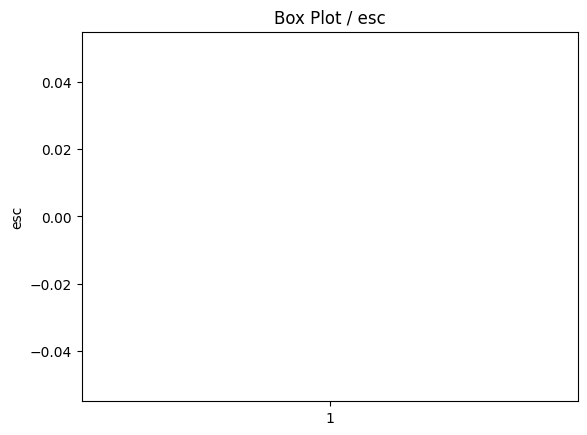

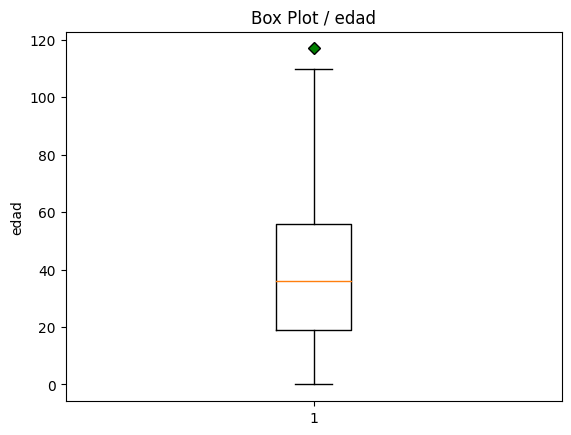

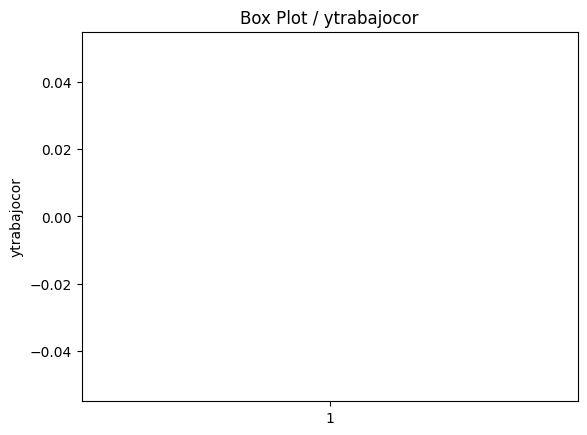

In [ ]:
#Buscando outliers con boxplot
cols_num = ['esc','edad','ytrabajocor']
green_diamond = dict(markerfacecolor='g', marker='D')
for i in cols_num:
  #fig = plt.figure(figsize =(7, 4))
  #plt.ylim(1, 100000000)
  plt.boxplot(df_2[i], flierprops=green_diamond)
  plt.title('Box Plot / ' + i)
  plt.ylabel(i)
  plt.show()

No es posible visualizar mediante este método visual (boxplot) outliers para los campos de esc y ytrabajocor, esto es debido a la presencia de valores perdidos en el dataframe df_2. Para el campo edad si es posible identificar y tenemos que existen valores por encima de 110 años de edad aproximadamente que serian candidatos para ser eliminados.

Imputare datos para luego corroborar outliers...

###**Analizando la columna "Edad"**

In [ ]:
#Validando la columna edad
df_2['edad'].value_counts()

50.0     3662
22.0     3521
24.0     3506
23.0     3468
21.0     3457
         ... 
102.0       3
105.0       2
104.0       2
110.0       1
117.0       1
Name: edad, Length: 108, dtype: int64

Text(0, 0.5, 'Frecuencia')

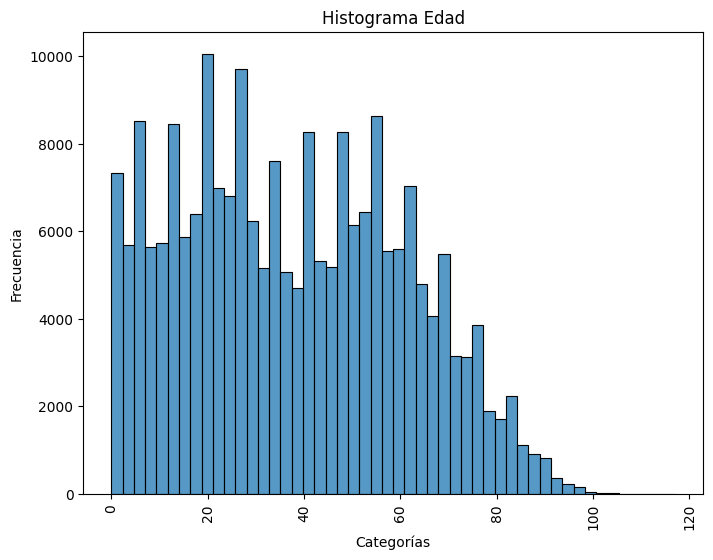

In [ ]:
#Histograma "edad"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["edad"], bins=50, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma Edad')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

In [ ]:
#IQR para edad
Q1_edad = np.percentile(df_2['edad'], 25, interpolation = 'midpoint')
Q3_edad = np.percentile(df_2['edad'], 75,interpolation = 'midpoint')
IQR_edad = Q3_edad - Q1_edad

#Por encima del limite superior
upper = df_2['edad'] >= (Q3_edad+1.5*IQR_edad)
print("Limite superior:",upper)
print(np.where(upper))

#Por encima del limite inferior
lower = df_2['edad'] <= (Q1_edad-1.5*IQR_edad)
print("Limite inferior:", lower)
print(np.where(lower))

Limite superior: 0         False
1         False
2         False
3         False
4         False
          ...  
216434    False
216435    False
216436    False
216437    False
216438    False
Name: edad, Length: 216439, dtype: bool
(array([138083]),)
Limite inferior: 0         False
1         False
2         False
3         False
4         False
          ...  
216434    False
216435    False
216436    False
216437    False
216438    False
Name: edad, Length: 216439, dtype: bool
(array([], dtype=int64),)


<ipython-input-12-26c20a0d69a8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1_edad = np.percentile(df_2['edad'], 25, interpolation = 'midpoint')
<ipython-input-12-26c20a0d69a8>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3_edad = np.percentile(df_2['edad'], 75,interpolation = 'midpoint')


In [ ]:
#Verificando outliers por arriba
upper.value_counts()
#Verificando outliers por abajo
#lower.value_counts()

False    216438
True          1
Name: edad, dtype: int64

In [ ]:
#Filtrando para saber index del outlier
#type(upper)
upper.where(lambda x : x==True).dropna()

138083    True
Name: edad, dtype: object

In [ ]:
#Identificando oulier y corroborando lo que cruza entre la inspección visual y el valor máximo
df_2.loc[df_2.index==138083]

,esc,rama1,oficio1,region,sexo,zona,edad,activ,ytrabajocor
138083,0.0,NaN,NaN,Región de Los Lagos,Hombre,Urbano,117.0,Inactivos,NaN


Mediante IQR se desmuestra que existe un valor como outlier, este valor es 117 de indice 138083, eliminemos este valor del dataframe...

In [ ]:
#Eliminando outlier en "edad"
df_2.drop(138083,inplace = True)

<ipython-input-16-30c64585c651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(138083,inplace = True)


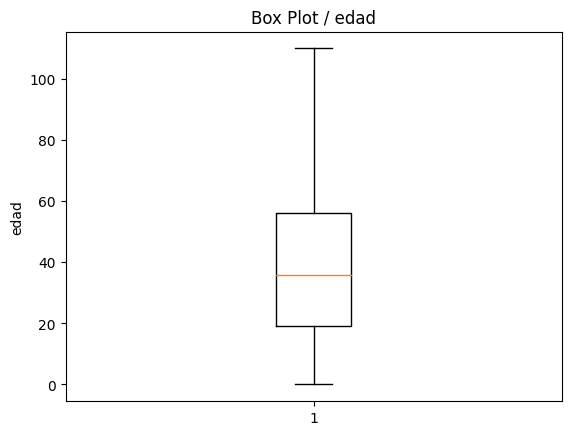

In [ ]:
#Verificando la presencia del outlier en "edad"
green_diamond = dict(markerfacecolor='g', marker='D')
#fig = plt.figure(figsize =(7, 4))
#plt.ylim(1, 100000000)
plt.boxplot(df_2["edad"], flierprops=green_diamond)
plt.title('Box Plot / edad')
plt.ylabel('edad')
plt.show()

Imputando los valores de las columnas númericas con outliers, recordemos que: "esc" cuenta con un 19,58%

###**Analizando nuevamente la columna "esc"**

In [ ]:
#Imputando con la media (probemos...)
df_2["esc"].fillna(df_2["esc"].mean(),inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216438 entries, 0 to 216438
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   esc          216438 non-null  float64 
 1   rama1        92417 non-null   category
 2   oficio1      92417 non-null   category
 3   region       216438 non-null  category
 4   sexo         216438 non-null  category
 5   zona         216438 non-null  category
 6   edad         216438 non-null  float64 
 7   activ        175075 non-null  category
 8   ytrabajocor  97235 non-null   float64 
dtypes: category(6), float64(3)
memory usage: 7.8 MB


<ipython-input-17-5d796973e2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["esc"].fillna(df_2["esc"].mean(),inplace=True)


In [ ]:
df_2["esc"].value_counts()

12.000000    50294
10.825833    42381
8.000000     15666
15.000000    12995
17.000000    12830
10.000000    11453
6.000000      9159
11.000000     7344
14.000000     7193
9.000000      6720
16.000000     6491
13.000000     5561
4.000000      5024
0.000000      4712
3.000000      4375
7.000000      3346
5.000000      3291
2.000000      2429
18.000000     1908
19.000000     1251
1.000000      1167
20.000000      423
21.000000      224
22.000000      201
Name: esc, dtype: int64

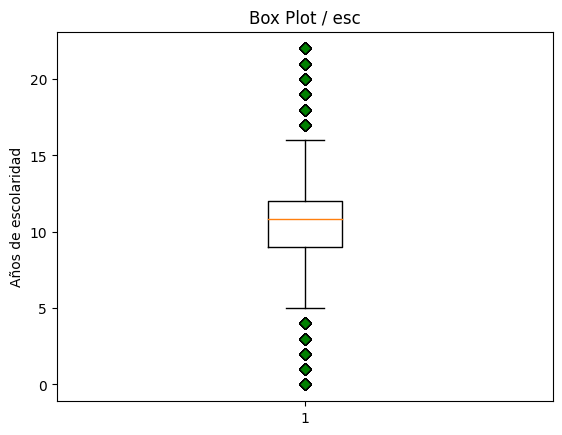

In [ ]:
#Verificando la presencia del outlier "esc", antes se tuvieron que imputar los valores perdidos
green_diamond = dict(markerfacecolor='g', marker='D')
#fig = plt.figure(figsize =(7, 4))
#plt.ylim(1, 100000000)
plt.boxplot(df_2["esc"], flierprops=green_diamond)
plt.title('Box Plot / esc')
plt.ylabel('Años de escolaridad')
plt.show()

Voy hacer un histrograma para verificar la distribución de los datos...

Text(0, 0.5, 'Frecuencia')

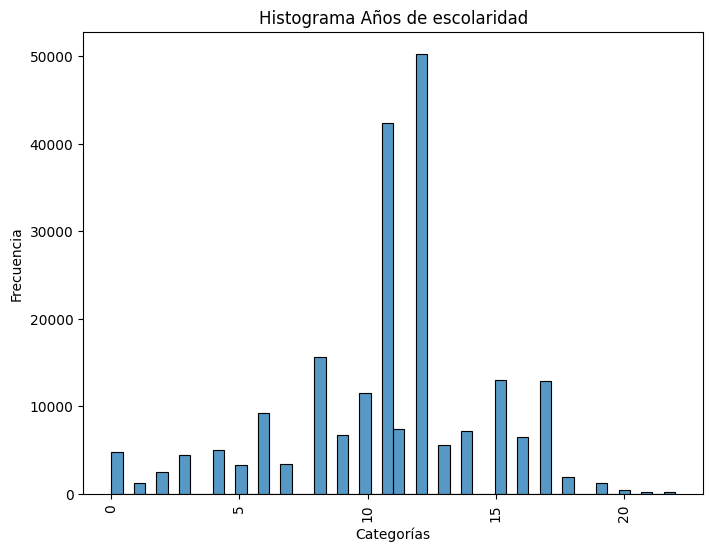

In [ ]:
#Histograma "esc"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["esc"], bins=50, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma Años de escolaridad')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Vemos una distribución de los datos con cierta tendencia a estar centrada.Concluyo dejar la data tal cual, no voy a eliminar valores cercanos a las fronteras por que no corresponde por el contexto de la variable. Analizando la dispersión entre años de escolaridad y la variable dependiente

Text(0, 0.5, 'Ingreso del trabajador')

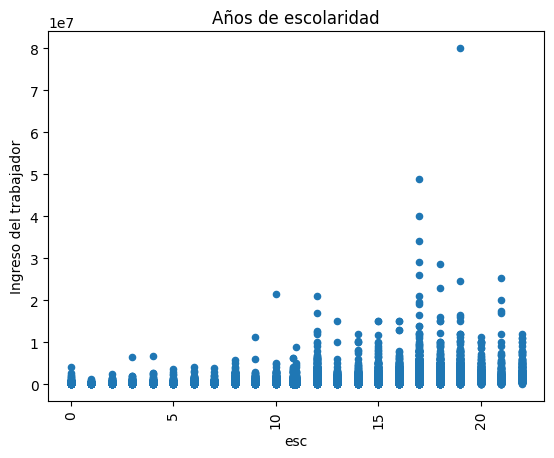

In [ ]:
#Dispersión 'esc' y 'ytrabajocor'
df_2.plot.scatter(x='esc', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('Años de escolaridad')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Probemos eliminar el outlier identificado por encima de 8x10e7 y menor de 20 años y luego gráficamos de nuevo...
df_2.loc[df_2["ytrabajocor"]>=70000000]

,esc,rama1,oficio1,region,sexo,zona,edad,activ,ytrabajocor
28335,19.0,Servicios sociales y de salud,"Profesionales, científicos e intelectuale",Región de Coquimbo,Hombre,Rural,50.0,Ocupados,80000000.0


En base a la inspección visual el outlier es el item 28335, corroboremos mediante IQR

In [ ]:
#Eliminando outlier en "edad"
df_2.drop(28335,inplace = True)

<ipython-input-19-d7100f018293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(28335,inplace = True)


Text(0, 0.5, 'Ingreso del trabajador')

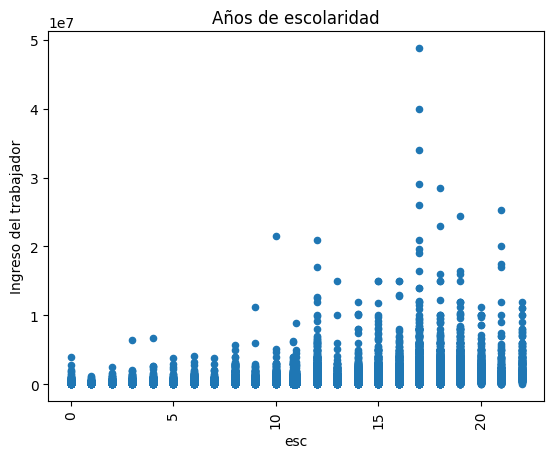

In [ ]:
#Dispersión 'esc' y 'ytrabajocor'
df_2.plot.scatter(x='esc', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('Años de escolaridad')
plt.ylabel('Ingreso del trabajador')

A simple vista parece haber una relación entre las variables, visualmente positiva, por lo tanto...

In [ ]:
#Correlación 'esc' y 'ytrabajocor'
df_2['esc'].corr(df_2['ytrabajocor'])

0.34767447084850905

###**Analizando la columna "rama1"**

Para esta columna el porcentaje de datos perdidos es muy alto, especificamente de un 57.301133%

In [ ]:
#Revisando las categorias
df_2['rama1'].value_counts()

Comercio al por mayor y al por menor                         16744
Agricultura, ganadería, caza y silvicultura                  10776
Construcción                                                  8254
Industrias manufactureras                                     7773
Enseñanza                                                     7452
Transporte, almacenamiento y comunicaciones                   6399
Actividades inmobiliarias, empresariales y de alquiler        5593
Administración pública y defensa                              5180
Hogares privados con servicio doméstico                       5026
Servicios sociales y de salud                                 4855
Hoteles y restaurantes                                        4566
Otras actividades de servicios comunitarios, sociales y p     3083
Explotación de minas y canteras                               2326
Pesca                                                         1501
Intermediación financiera                                     

In [ ]:
#Imputar los valores nulos en columnas categóricas con el valor más frecuente (la moda)
df_2["rama1"].fillna(df_2["rama1"].mode().iloc[0],inplace=True)

<ipython-input-20-248798f64c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["rama1"].fillna(df_2["rama1"].mode().iloc[0],inplace=True)


In [ ]:
#Verificando el cambio...
df_2["rama1"].value_counts()

Comercio al por mayor y al por menor                         140765
Agricultura, ganadería, caza y silvicultura                   10776
Construcción                                                   8254
Industrias manufactureras                                      7773
Enseñanza                                                      7452
Transporte, almacenamiento y comunicaciones                    6399
Actividades inmobiliarias, empresariales y de alquiler         5593
Administración pública y defensa                               5180
Hogares privados con servicio doméstico                        5026
Servicios sociales y de salud                                  4855
Hoteles y restaurantes                                         4566
Otras actividades de servicios comunitarios, sociales y p      3083
Explotación de minas y canteras                                2326
Pesca                                                          1501
Intermediación financiera                       

La categoria "Sin dato" también podría ser imputada, por lo tanto...

In [ ]:
#Remplazando "Sin dato" por la moda
df_2["rama1"].replace("Sin dato",df_2["rama1"].mode().loc[0], inplace=True)

<ipython-input-21-65c624831fad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["rama1"].replace("Sin dato",df_2["rama1"].mode().loc[0], inplace=True)


In [ ]:
df_2["rama1"].value_counts()

Comercio al por mayor y al por menor                         141746
Agricultura, ganadería, caza y silvicultura                   10776
Construcción                                                   8254
Industrias manufactureras                                      7773
Enseñanza                                                      7452
Transporte, almacenamiento y comunicaciones                    6399
Actividades inmobiliarias, empresariales y de alquiler         5593
Administración pública y defensa                               5180
Hogares privados con servicio doméstico                        5026
Servicios sociales y de salud                                  4855
Hoteles y restaurantes                                         4566
Otras actividades de servicios comunitarios, sociales y p      3083
Explotación de minas y canteras                                2326
Pesca                                                          1501
Intermediación financiera                       

Text(0, 0.5, 'Frecuencia')

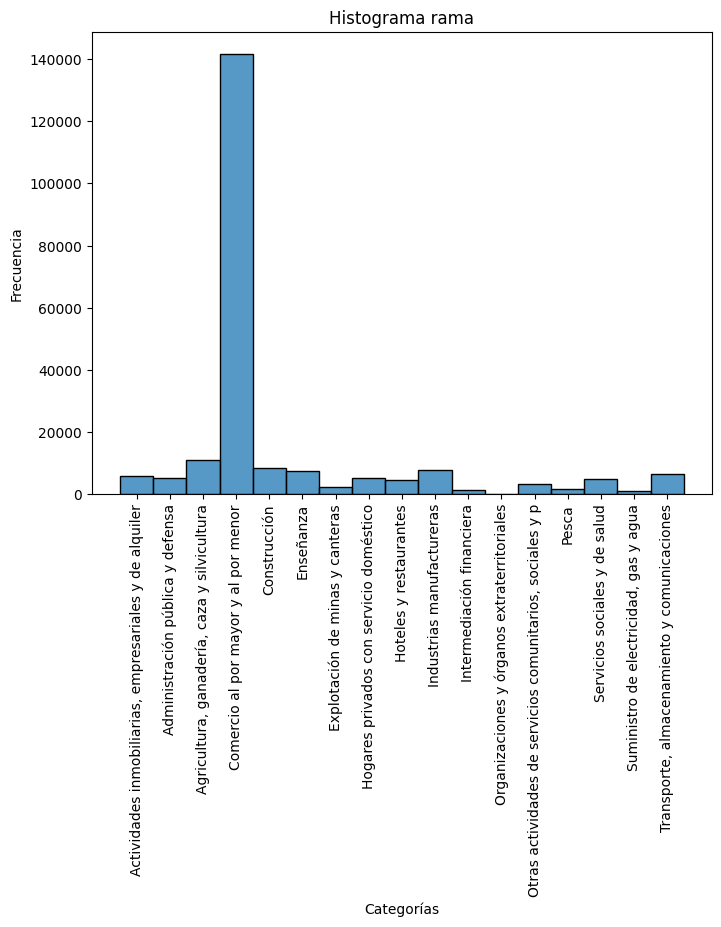

In [ ]:
#Histograma "rama1"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["rama1"], bins=50, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma rama')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Ingreso del trabajador')

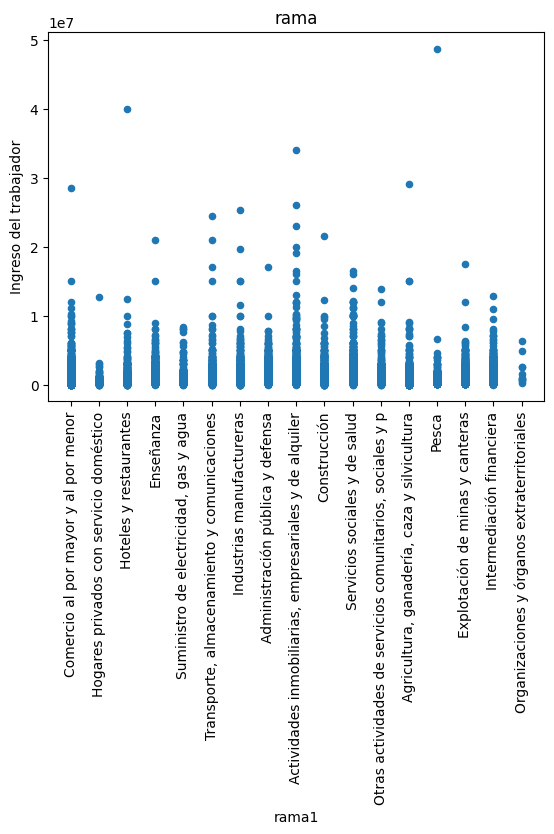

In [ ]:
#Dispersión 'rama1' y 'ytrabajocor'
df_2.plot.scatter(x='rama1', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('rama')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Codification one-hot (no hay un orden jerarquico, son valores nominales). Creamos las variables binarias
dummies_rama1 = pd.get_dummies(df_2['rama1'], drop_first = False)
#Renombrando columnas
dummies_rama1.rename(columns = {'Administración pública y defensa':'d_rama1_administracion_publica_y_defensa',
                                'Agricultura, ganadería, caza y silvicultura':'d_rama1_agricultura_ganadería_caza_y_silvicultura',
                                'Construcción':'d_rama1_construccion',
                                'Enseñanza':'d_rama1_enseñanza',
                                'Explotación de minas y canteras':'d_rama1_explotacion_de_minas_y_canteras',
                                'Hogares privados con servicio doméstico':'d_rama1_hogares_privados_con_servicio_doméstico',
                                'Hoteles y restaurantes':'d_rama1_hoteles_y_restaurantes',
                                'Industrias manufactureras':'d_rama1_industrias_manufactureras',
                                'Intermediación financiera':'d_rama1_intermediacion_financiera',
                                'Organizaciones y órganos extraterritoriales':'d_rama1_organizaciones_y_organos_extraterritoriales',
                                'Otras actividades de servicios comunitarios, sociales y p':'d_rama1_otras_actividades_de_servicios_comunitarios_sociales_y_p',
                                'Pesca':'d_rama1_pesca',
                                'Servicios sociales y de salud':'d_rama1_servicios_sociales_y_de_salud',
                                'Suministro de electricidad, gas y agua':'d_rama1_suministro_de_electricidad_gas_y_agua',
                                'Transporte, almacenamiento y comunicaciones':'d_rama1_transporte_almacenamiento_y_comunicaciones',
                                'Comercio al por mayor y al por menor':'d_rama1_Comercio_al_por_mayor_y_al_por_menor',
                                'Actividades inmobiliarias, empresariales y de alquiler':'d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler'}, inplace = True)
dummies_rama1.head()

,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,d_rama1_hoteles_y_restaurantes,d_rama1_industrias_manufactureras,d_rama1_intermediacion_financiera,d_rama1_organizaciones_y_organos_extraterritoriales,d_rama1_otras_actividades_de_servicios_comunitarios_sociales_y_p,d_rama1_pesca,d_rama1_servicios_sociales_y_de_salud,d_rama1_suministro_de_electricidad_gas_y_agua,d_rama1_transporte_almacenamiento_y_comunicaciones
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Añadimos las variables binarias al DataFrame
df_2 = pd.concat([df_2, dummies_rama1], axis = 1)
#Eliminamos la vairable original race
#df_2 = df_2.drop(columns=['rama1'])

###**Analizando la columna "oficio1"**

Para esta columna el porcentaje de datos perdidos es muy alto, especificamente de un 57.301133%

In [ ]:
#Revisando las categorias
df_2['oficio1'].value_counts()

Trabajadores no calificado                                      21208
Trabajadores de los servicios y vendedores de comerci           14196
Oficiales, operarios y artesanos de artes mecánicas y de otr    12985
Profesionales, científicos e intelectuale                       10426
Técnicos profesionales de nivel medi                             9064
Operadores de instalaciones y máquinas y montadore               8188
Empleados de oficina                                             6467
Agricultores y trabajadores calificados agropecuarios y pesq     4807
Miembros del poder ejecutivo y de los cuerpos legislativo        4337
Fuerzas Armada                                                    453
Sin dato                                                          285
Name: oficio1, dtype: int64

In [ ]:
#Imputar los valores nulos en columnas categóricas con el valor más frecuente (la moda)
df_2["oficio1"].fillna(df_2["oficio1"].mode().iloc[0],inplace=True)

In [ ]:
df_2['oficio1'].value_counts()

Trabajadores no calificado                                      145229
Trabajadores de los servicios y vendedores de comerci            14196
Oficiales, operarios y artesanos de artes mecánicas y de otr     12985
Profesionales, científicos e intelectuale                        10426
Técnicos profesionales de nivel medi                              9064
Operadores de instalaciones y máquinas y montadore                8188
Empleados de oficina                                              6467
Agricultores y trabajadores calificados agropecuarios y pesq      4807
Miembros del poder ejecutivo y de los cuerpos legislativo         4337
Fuerzas Armada                                                     453
Sin dato                                                           285
Name: oficio1, dtype: int64

Imputando los valores "Sin dato"

In [ ]:
#Remplazando "Sin dato" por la moda
df_2["oficio1"].replace("Sin dato",df_2["oficio1"].mode().loc[0], inplace=True)

Haciendo un histograma...

Text(0, 0.5, 'Frecuencia')

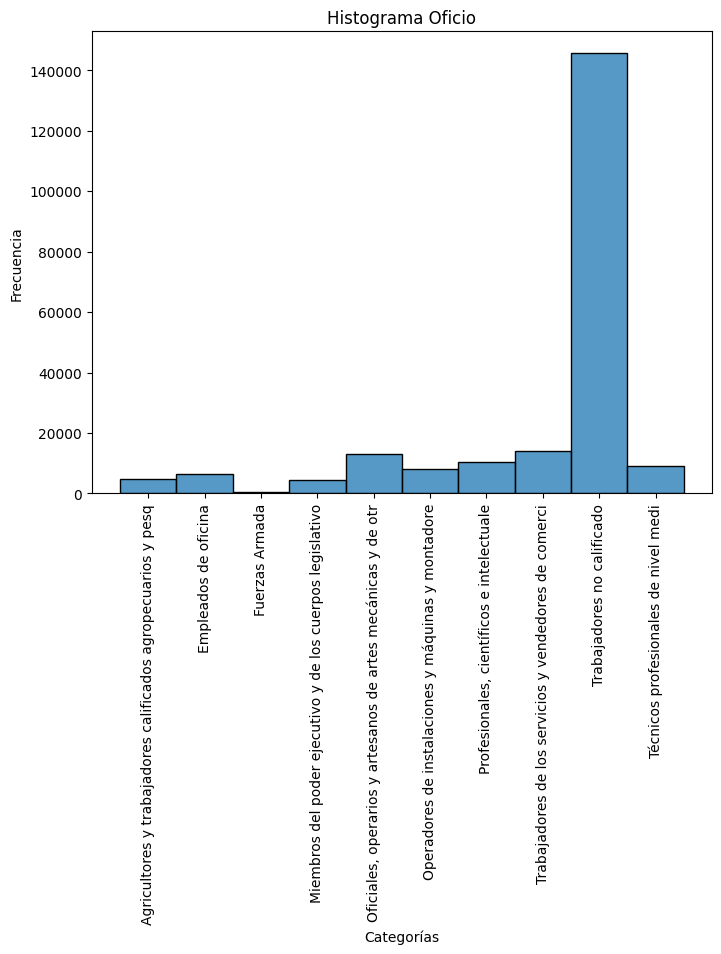

In [ ]:
#Histograma "oficio1"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["oficio1"], bins=30, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma Oficio')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Ingreso del trabajador')

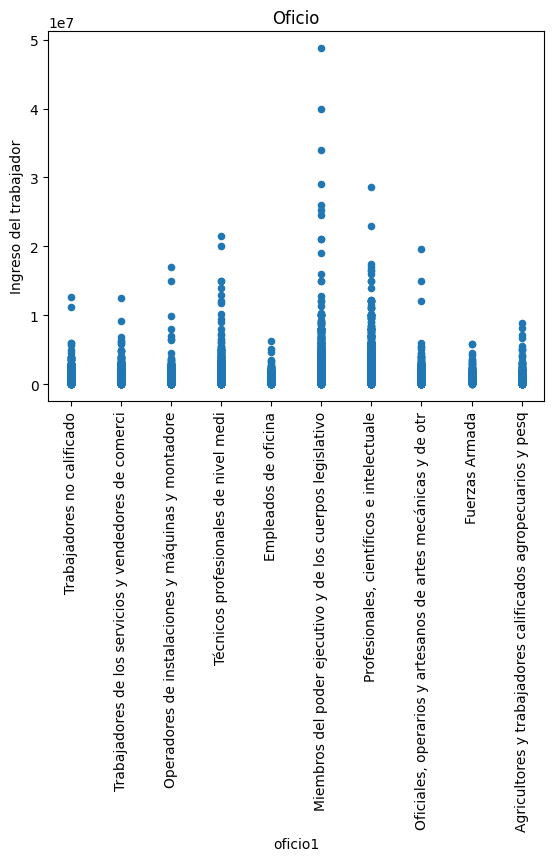

In [ ]:
#Dispersión 'oficio1' y 'ytrabajocor'
df_2.plot.scatter(x='oficio1', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('Oficio')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Codification one-hot (no hay un orden jerarquico, son valores nominales). Creamos las variables binarias
dummies_oficio1 = pd.get_dummies(df_2['oficio1'], drop_first = False)
#Renombrando columnas
dummies_oficio1.rename(columns = {'Trabajadores no calificado':'d_oficio1_trabajadores_no_calificao',
                                  'Trabajadores de los servicios y vendedores de comerci':'d_oficio1_trabajadores_de_los_servicios_y_vendedores_de_comerci',
                                  'Oficiales, operarios y artesanos de artes mecánicas y de otr':'d_oficio1_oficiales_operarios_y_artesanos_de_artes_mecánicas_y_de_otr',
                                  'Profesionales, científicos e intelectuale':'d_oficio1_profesionales_científicos_e_intelectuale',
                                  'Técnicos profesionales de nivel medi':'d_oficio1_Técnicos_profesionales_de_nivel_medi',
                                  'Operadores de instalaciones y máquinas y montadore':'d_oficio1_operadores_de_instalaciones_y_máquinas_y_montadore',
                                  'Empleados de oficina':'d_oficio1_empleados_de_oficina',
                                  'Agricultores y trabajadores calificados agropecuarios y pesq':'d_oficio1_agricultores_y_trabajadores_calificados_agropecuarios_y_pesq',
                                  'Miembros del poder ejecutivo y de los cuerpos legislativo':'d_oficio1_miembros_del_poder_ejecutivo_y_de_los_cuerpos_legislativo',
                                  'Fuerzas Armada':'d_oficio1_fuerzas_Armada',
                                  }, inplace = True)
dummies_oficio1.head()

,d_oficio1_agricultores_y_trabajadores_calificados_agropecuarios_y_pesq,d_oficio1_empleados_de_oficina,d_oficio1_fuerzas_Armada,d_oficio1_miembros_del_poder_ejecutivo_y_de_los_cuerpos_legislativo,d_oficio1_oficiales_operarios_y_artesanos_de_artes_mecánicas_y_de_otr,d_oficio1_operadores_de_instalaciones_y_máquinas_y_montadore,d_oficio1_profesionales_científicos_e_intelectuale,d_oficio1_trabajadores_de_los_servicios_y_vendedores_de_comerci,d_oficio1_trabajadores_no_calificao,d_oficio1_Técnicos_profesionales_de_nivel_medi
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Añadimos las variables binarias al DataFrame
df_2 = pd.concat([df_2, dummies_oficio1], axis = 1)
#Eliminamos la vairable original race
#df_2 = df_2.drop(columns=['oficio1'])

###**Analizando la columna "region"**

In [ ]:
df_2["region"].value_counts()

Región Metropolitana de Santiago                    42601
Región del Biobío                                   21532
Región de Valparaíso                                19625
Región del Libertador Gral. Bernardo O’Higgins      15862
Región de La Araucanía                              15481
Región del Maule                                    15208
Región de Los Lagos                                 12441
Región de Los Ríos                                  10175
Región de Tarapacá                                  10150
Región de Coquimbo                                   9951
Región de Antofagasta                                8510
Región de Ñuble                                      8370
Región de Arica y Parinacota                         7888
Región de Atacama                                    6961
Región de Magallanes y de la Antártica Chilena       6637
Región de Ayséndel Gral. Carlos Ibáñez del Campo     5045
Name: region, dtype: int64

Text(0, 0.5, 'Frecuencia')

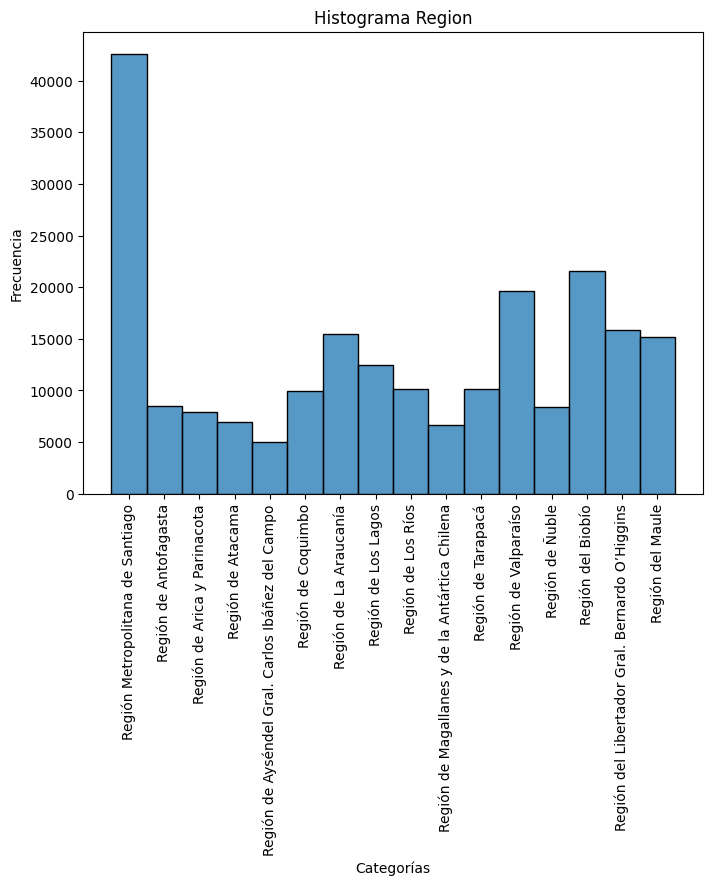

In [ ]:
#Histograma "region"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["region"], bins=30, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma Region')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Ingreso del trabajador')

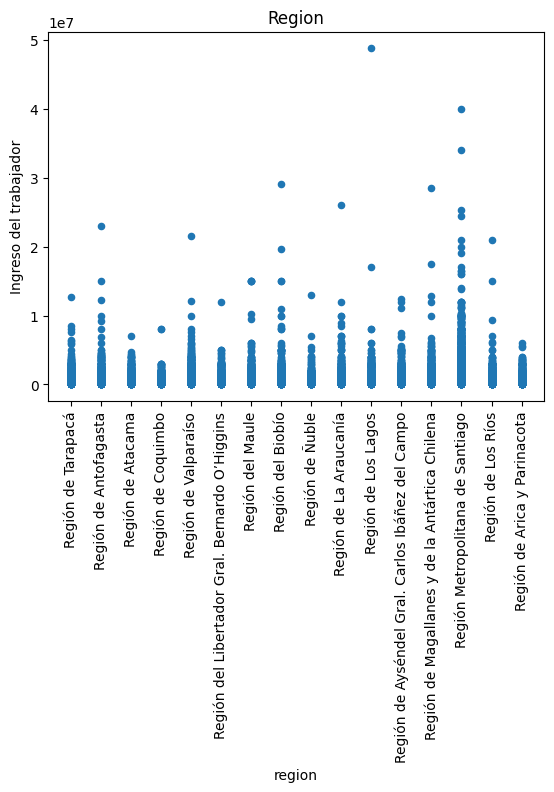

In [ ]:
#Dispersión 'region' y 'ytrabajocor'
df_2.plot.scatter(x='region', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('Region')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Codification one-hot (no hay un orden jerarquico, son valores nominales). Creamos las variables binarias
dummies_region = pd.get_dummies(df_2['region'], drop_first = False)
#Renombrando columnas
dummies_region.rename(columns = {'Región Metropolitana de Santiago':'d_region_r_metropolitana_de_Santiago',
                                  'Región del Biobío':'d_region_r_del_Biobío',
                                  'Región de Valparaíso':'d_region_r_de Valparaíso',
                                  'Región del Libertador Gral. Bernardo O’Higgins':'d_region_r_O’Higgins',
                                  'Región de La Araucanía':'d_region_r_la_Araucanía',
                                  'Región del Maule':'d_region_r_del_Maule',
                                  'Región de Los Lagos':'d_region_r_los_Lagos',
                                  'Región de Los Ríos':'d_region_r_los_Ríos',
                                  'Región de Tarapacá':'d_region_r_tarapacá',
                                  'Región de Coquimbo':'d_region_r_coquimbo',
                                  'Región de Antofagasta':'d_region_r_antofagasta',
                                  'Región de Ñuble':'d_region_r_ñuble',
                                  'Región de Arica y Parinacota':'d_region_r_arica_y_parinacota',
                                  'Región de Atacama':'d_region_r_atacama',
                                  'Región de Magallanes y de la Antártica Chilena':'d_region_r_magallanes_y_antartica',
                                  'Región de Ayséndel Gral. Carlos Ibáñez del Campo':'d_region_r_aysén',
                                  }, inplace = True)
dummies_region.head()

,d_region_r_metropolitana_de_Santiago,d_region_r_antofagasta,d_region_r_arica_y_parinacota,d_region_r_atacama,d_region_r_aysén,d_region_r_coquimbo,d_region_r_la_Araucanía,d_region_r_los_Lagos,d_region_r_los_Ríos,d_region_r_magallanes_y_antartica,d_region_r_tarapacá,d_region_r_de Valparaíso,d_region_r_ñuble,d_region_r_del_Biobío,d_region_r_O’Higgins,d_region_r_del_Maule
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Añadimos las variables binarias al DataFrame
df_2 = pd.concat([df_2, dummies_region], axis = 1)
#Eliminamos la vairable original race
#df_2 = df_2.drop(columns=['region'])

###**Analizando la columna "sexo"**

In [ ]:
df_2["sexo"].value_counts()

Mujer     113117
Hombre    103320
Name: sexo, dtype: int64

Text(0, 0.5, 'Frecuencia')

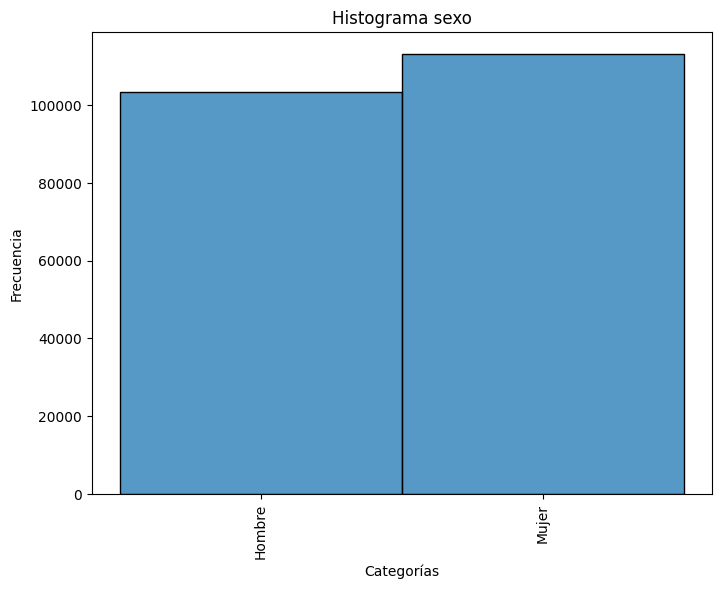

In [ ]:
#Histograma "sexo"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["sexo"], bins=30, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma sexo')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Ingreso del trabajador')

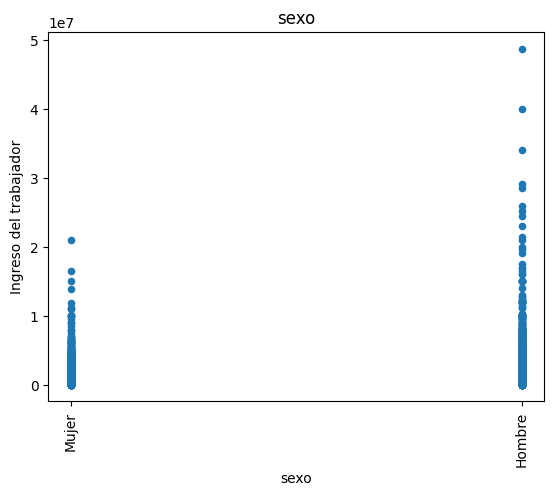

In [ ]:
#Dispersión 'sexo' y 'ytrabajocor'
df_2.plot.scatter(x='sexo', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('sexo')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Codification one-hot (no hay un orden jerarquico, son valores nominales). Creamos las variables binarias
dummies_sexo = pd.get_dummies(df_2['sexo'], drop_first = False)
dummies_sexo.rename(columns = {'Mujer':'d_sexo_mujer','Hombre':'d_sexo_hombre'}, inplace = True)
dummies_sexo.head(1)

,d_sexo_hombre,d_sexo_mujer
0,0,1


In [ ]:
#Añadimos las variables binarias al DataFrame
df_2 = pd.concat([df_2, dummies_sexo], axis = 1)
#Eliminamos la vairable original race
#df_2 = df_2.drop(columns=['sexo'])

Text(0, 0.5, 'Ingreso del trabajador')

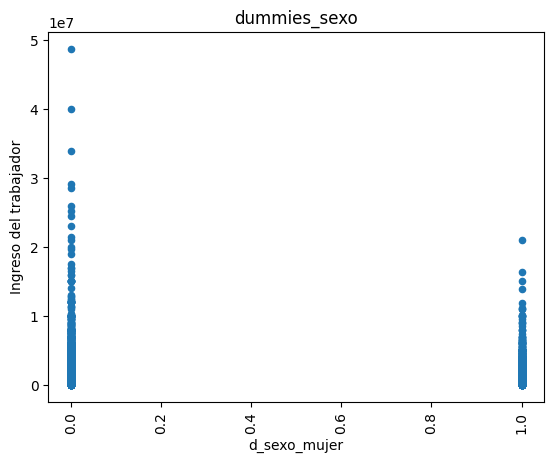

In [ ]:
#Dispersión 'dummies_sexo' y 'ytrabajocor'
df_2.plot.scatter(x='d_sexo_mujer', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('dummies_sexo')
plt.ylabel('Ingreso del trabajador')

###**Analizando la columna "zona"**

In [ ]:
df_2["zona"].value_counts()

Urbano    175771
Rural      40666
Name: zona, dtype: int64

Text(0, 0.5, 'Frecuencia')

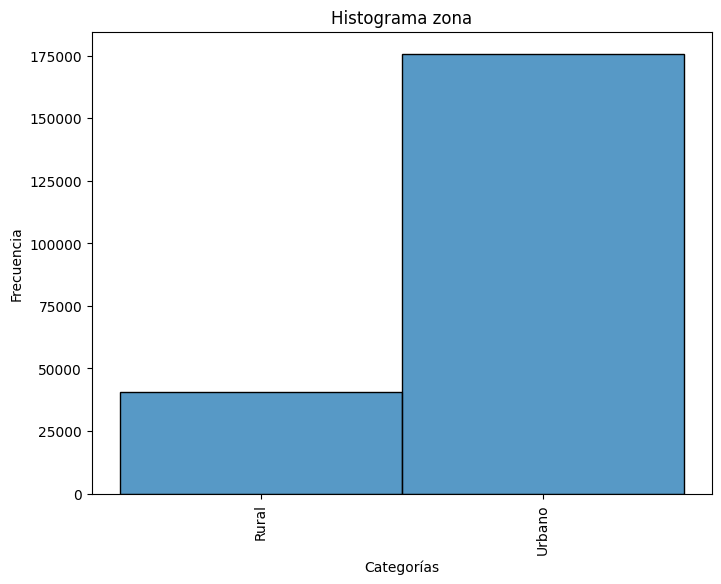

In [ ]:
#Histograma "zona"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["zona"], bins=30, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma zona')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Ingreso del trabajador')

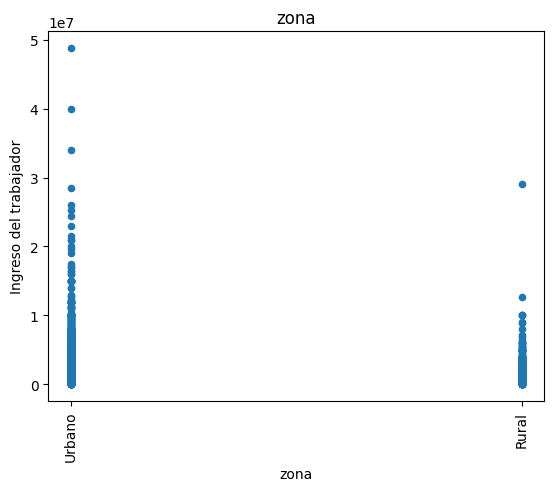

In [ ]:
#Dispersión 'zona' y 'ytrabajocor'
df_2.plot.scatter(x='zona', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('zona')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Codification one-hot (no hay un orden jerarquico, son valores nominales). Creamos las variables binarias
dummies_zona = pd.get_dummies(df_2['zona'], drop_first = False)
dummies_zona.rename(columns = {'Urbano':'d_zona_urbano','Rural':'d_zona_rural'}, inplace = True)
dummies_zona.head(1)

,d_zona_rural,d_zona_urbano
0,0,1


Urbano = 1, Rural = 0

In [ ]:
#Añadimos las variables binarias al DataFrame
df_2 = pd.concat([df_2, dummies_zona], axis = 1)
#Eliminamos la vairable original race
#df_2 = df_2.drop(columns=['zona'])

Text(0, 0.5, 'Ingreso del trabajador')

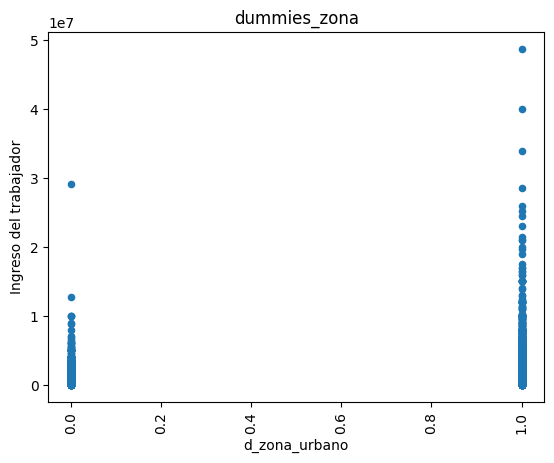

In [ ]:
#Dispersión 'dummies_zona' y 'ytrabajocor'
df_2.plot.scatter(x='d_zona_urbano', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('dummies_zona')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Correlación 'dummies_zona' y 'ytrabajocor'
df_2['d_zona_urbano'].corr(df_2['ytrabajocor'])

0.11331802975340644

###**Analizando la columna "activ"**

In [ ]:
df_2['activ'].value_counts()

Ocupados       92416
Inactivos      74855
Desocupados     7803
Name: activ, dtype: int64

Imputando los valores, recordemos que: "activ" cuenta con un 19,11%

In [ ]:
#Imputando con la media (probemos...)
df_2["activ"].fillna(df_2["activ"].mode().iloc[0],inplace=True)
df_2["activ"].isnull().sum()

0

In [ ]:
df_2['activ'].value_counts()

Ocupados       133779
Inactivos       74855
Desocupados      7803
Name: activ, dtype: int64

Text(0, 0.5, 'Frecuencia')

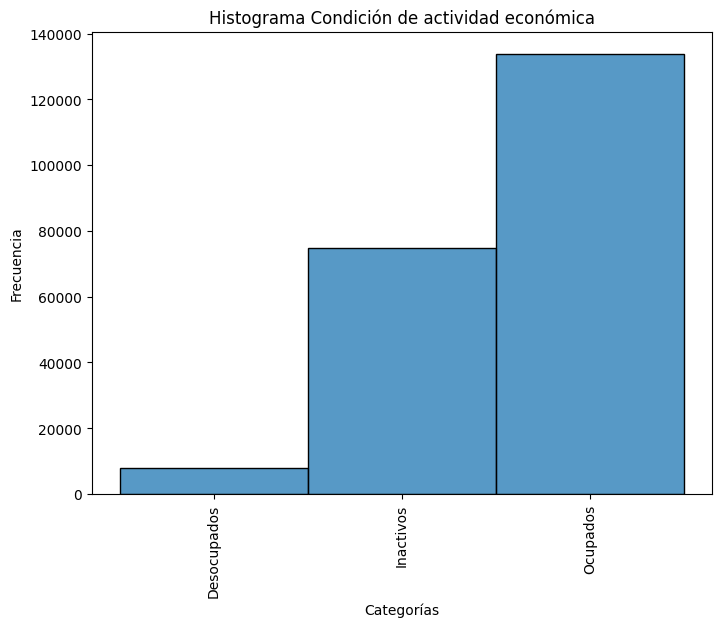

In [ ]:
#Histograma "activ"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["activ"], bins=50, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma Condición de actividad económica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Ingreso del trabajador')

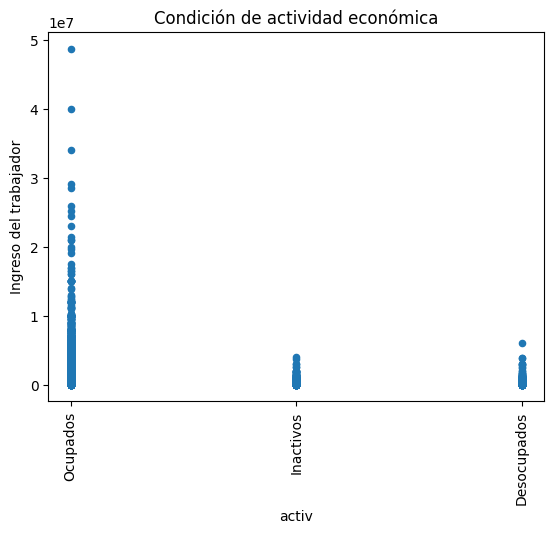

In [ ]:
#Dispersión 'activ' y 'ytrabajocor'
df_2.plot.scatter(x='activ', y='ytrabajocor')
plt.xticks(rotation=90)
plt.title('Condición de actividad económica')
plt.ylabel('Ingreso del trabajador')

In [ ]:
#Codification one-hot (no hay un orden jerarquico, son valores nominales). Creamos las variables binarias
dummies_activ = pd.get_dummies(df_2['activ'], drop_first = False)
#Renombrando columnas
dummies_activ.rename(columns = {'Ocupados':'d_activ_Ocupados',
                                'Inactivos':'d_activ_Inactivos',
                                'Desocupados':'d_activ_Desocupados',}, inplace = True)
dummies_activ.head(1)

,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados
0,0,0,1


In [ ]:
#Añadimos las variables binarias al DataFrame
df_2 = pd.concat([df_2, dummies_activ], axis = 1)
#Eliminamos la vairable original race
#df_2 = df_2.drop(columns=['activ'])

###**Analizando la columna "ytrabajocor"**

In [ ]:
df_2["ytrabajocor"].describe()

count    2.164370e+05
mean     5.139786e+05
std      5.086319e+05
min      4.200000e+01
25%      3.700000e+05
50%      5.139786e+05
75%      5.139786e+05
max      4.876500e+07
Name: ytrabajocor, dtype: float64

De la descripción anterior podemos tener una noción de la distribución y caracteristicas de la variable ingreso de trabajador...

Es necesario imputar los datos para esta columna...

In [ ]:
#Porcentaje de datos perdidos/campo
df_2["ytrabajocor"].isnull().sum()/len(df_2["ytrabajocor"])*100

55.075148888591144

In [ ]:
#Imputando por la media
df_2["ytrabajocor"].fillna(df_2["ytrabajocor"].mean(),inplace=True)

Text(0, 0.5, 'Frecuencia')

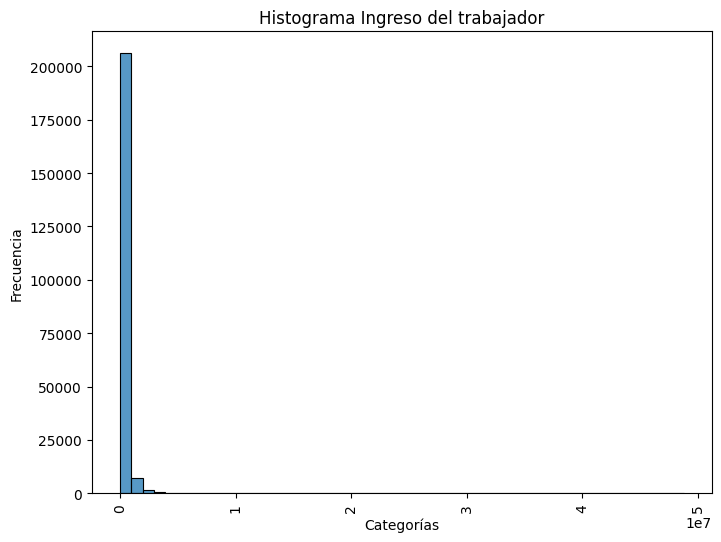

In [ ]:
#Histograma "ytrabajocor"
plt.figure(figsize=(8, 6))
sns.histplot(df_2["ytrabajocor"], bins=50, kde=False)
plt.xticks(rotation=90)
plt.title('Histograma Ingreso del trabajador')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

###**Relación entre las variables**

<ipython-input-136-5d2a39f86d46>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(df_2[atributos].corr(),cmap='coolwarm')


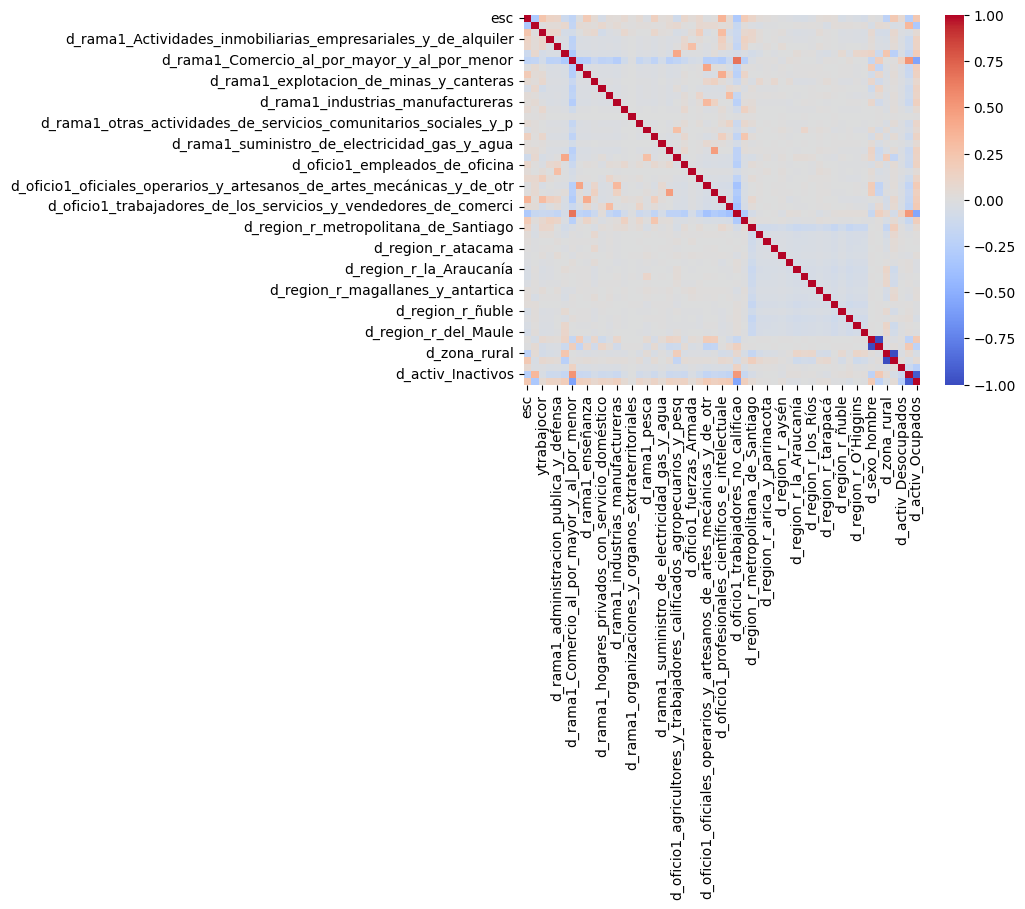

In [ ]:
#Impresión de correlaciones entre variables númericas
atributos = list(df_2.columns)
s = sns.heatmap(df_2[atributos].corr(),cmap='coolwarm')
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=10)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

Vemos predominantemente relaciones bajas en la mayor parte de la suficie del mapa.

In [ ]:
#Ordenando correlaciones
corr = df_2.corr()
corr[['ytrabajocor']].sort_values(by = 'ytrabajocor',ascending = False).style.background_gradient()

<ipython-input-40-f2bccd304763>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_2.corr()


,ytrabajocor
ytrabajocor,1.000000
d_oficio1_profesionales_científicos_e_intelectuale,0.311551
esc,0.243395
d_oficio1_miembros_del_poder_ejecutivo_y_de_los_cuerpos_legislativo,0.174446
d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,0.101057
d_region_r_metropolitana_de_Santiago,0.099723
d_rama1_administracion_publica_y_defensa,0.095910
d_rama1_servicios_sociales_y_de_salud,0.093715
d_rama1_intermediacion_financiera,0.083383
d_rama1_explotacion_de_minas_y_canteras,0.080159


In [ ]:
#Copiando dataframe final (respaldo de resultados)
df_reg = df_2.copy()
df_reg.shape

(216437, 59)

In [ ]:
#Visualizando las columnas actuales
df_reg.columns

Index(['esc', 'rama1', 'oficio1', 'region', 'sexo', 'zona', 'edad', 'activ',
       'ytrabajocor',
       'd_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler',
       'd_rama1_administracion_publica_y_defensa',
       'd_rama1_agricultura_ganadería_caza_y_silvicultura',
       'd_rama1_Comercio_al_por_mayor_y_al_por_menor', 'd_rama1_construccion',
       'd_rama1_enseñanza', 'd_rama1_explotacion_de_minas_y_canteras',
       'd_rama1_hogares_privados_con_servicio_doméstico',
       'd_rama1_hoteles_y_restaurantes', 'd_rama1_industrias_manufactureras',
       'd_rama1_intermediacion_financiera',
       'd_rama1_organizaciones_y_organos_extraterritoriales',
       'd_rama1_otras_actividades_de_servicios_comunitarios_sociales_y_p',
       'd_rama1_pesca', 'd_rama1_servicios_sociales_y_de_salud',
       'd_rama1_suministro_de_electricidad_gas_y_agua',
       'd_rama1_transporte_almacenamiento_y_comunicaciones',
       'd_oficio1_agricultores_y_trabajadores_calificados_agropecuari

Del análisis e investigación anterior, podemos decir:

*   Los años de escolaridad y oficio podrían ser los mejores predictores basandose en el % de correlación para estimar el salario de un trabajo, sin embargo, este % no es alto, tendiendo a ser correlaciones debiles y que serán puestas a pruebas por los modelos que suceden a este apartado, a estas dos variables suceden la zona y la actividad económica. Estas variables serán consideradas para el modelo de estimación.
*   Entre las variables que pudieran tener poco impacto, revisemos las que se acercan más a 0, como podría ser la edad por ejemplo. Podrían hacerse pruebas suprimiendo esta variable del x_columns posterior para ver su impacto en el módelo.

Adicionalmente, las medidas de imputación implementadas en valores categoricos como el uso de la moda, podrian ser sustituidas por el valor de la mediana, o algún otro método para estimar mejor la distribución de estos párametros.

# **II) Train Test Split** <br> 0.5pts
Separe los datos en un set de entrenamiento y otro de testeo, donde este último corresponda al 20% de los datos.

In [ ]:
#Definiendo variables independientes (predictores)
X_columns = ['esc','edad',
       'd_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler',
       'd_rama1_administracion_publica_y_defensa',
       'd_rama1_agricultura_ganadería_caza_y_silvicultura',
       'd_rama1_Comercio_al_por_mayor_y_al_por_menor', 'd_rama1_construccion',
       'd_rama1_enseñanza', 'd_rama1_explotacion_de_minas_y_canteras',
       'd_rama1_hogares_privados_con_servicio_doméstico',
       'd_rama1_hoteles_y_restaurantes', 'd_rama1_industrias_manufactureras',
       'd_rama1_intermediacion_financiera',
       'd_rama1_organizaciones_y_organos_extraterritoriales',
       'd_rama1_otras_actividades_de_servicios_comunitarios_sociales_y_p',
       'd_rama1_pesca', 'd_rama1_servicios_sociales_y_de_salud',
       'd_rama1_suministro_de_electricidad_gas_y_agua',
       'd_rama1_transporte_almacenamiento_y_comunicaciones',
       'd_oficio1_agricultores_y_trabajadores_calificados_agropecuarios_y_pesq',
       'd_oficio1_empleados_de_oficina', 'd_oficio1_fuerzas_Armada',
       'd_oficio1_miembros_del_poder_ejecutivo_y_de_los_cuerpos_legislativo',
       'd_oficio1_oficiales_operarios_y_artesanos_de_artes_mecánicas_y_de_otr',
       'd_oficio1_operadores_de_instalaciones_y_máquinas_y_montadore',
       'd_oficio1_profesionales_científicos_e_intelectuale',
       'd_oficio1_trabajadores_de_los_servicios_y_vendedores_de_comerci',
       'd_oficio1_trabajadores_no_calificao',
       'd_oficio1_Técnicos_profesionales_de_nivel_medi',
       'd_region_r_metropolitana_de_Santiago', 'd_region_r_antofagasta',
       'd_region_r_arica_y_parinacota', 'd_region_r_atacama',
       'd_region_r_aysén', 'd_region_r_coquimbo', 'd_region_r_la_Araucanía',
       'd_region_r_los_Lagos', 'd_region_r_los_Ríos',
       'd_region_r_magallanes_y_antartica', 'd_region_r_tarapacá',
       'd_region_r_de Valparaíso', 'd_region_r_ñuble', 'd_region_r_del_Biobío',
       'd_region_r_O’Higgins', 'd_region_r_del_Maule', 'd_sexo_hombre',
       'd_sexo_mujer', 'd_zona_rural', 'd_zona_urbano', 'd_activ_Desocupados',
       'd_activ_Inactivos', 'd_activ_Ocupados']
#Definiendo variable dependiente
y_column = 'ytrabajocor'
#Definir variables dependientes/independientes
X = df_reg[X_columns]
y = df_reg[y_column]
#Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (173149, 52)
y_train: (173149,)
X_test: (43288, 52)
y_test: (43288,)


# **III) Escalamiento de Datos** <br> 0.5pts
Realice un escalamiento de los datos para que estén en dimensiones similares.

In [ ]:
#Escalar train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.30562239,  0.88507263, -0.16203912, ..., -0.19410781,
        -0.72755867,  0.78693021],
       [ 1.08614718, -0.77201232, -0.16203912, ..., -0.19410781,
         1.37445959, -1.27076073],
       [-1.77577704,  1.53918511, -0.16203912, ..., -0.19410781,
         1.37445959, -1.27076073],
       ...,
       [ 0.82597225, -0.24872234, -0.16203912, ..., -0.19410781,
        -0.72755867,  0.78693021],
       [ 0.30562239,  0.49260514, -0.16203912, ..., -0.19410781,
        -0.72755867,  0.78693021],
       [ 0.30562239, -0.81561982, -0.16203912, ..., -0.19410781,
         1.37445959, -1.27076073]])

In [ ]:
#A dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_region_r_del_Biobío,d_region_r_O’Higgins,d_region_r_del_Maule,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados
0,0.305622,0.885073,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930
1,1.086147,-0.772012,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761
2,-1.775777,1.539185,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,1.374460,-1.270761
3,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,5.023811,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930
4,0.825972,0.143745,-0.162039,6.412368,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173144,0.000134,-1.600555,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930
173145,-0.735077,1.277540,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,3.010724,-0.282034,-0.275197,1.049354,-1.049354,2.080146,-2.080146,-0.194108,-0.727559,0.786930
173146,0.825972,-0.248722,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930
173147,0.305622,0.492605,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,5.290427,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,-0.952967,0.952967,2.080146,-2.080146,-0.194108,-0.727559,0.786930


In [ ]:
#Escalar test con parametros del train
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_region_r_del_Biobío,d_region_r_O’Higgins,d_region_r_del_Maule,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados
0,0.305622,0.100138,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930
1,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,3.545673,-0.275197,-0.952967,0.952967,2.080146,-2.080146,-0.194108,1.374460,-1.270761
2,0.825972,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,3.633756,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930
3,0.305622,0.405390,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930
4,-0.474902,0.797858,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,3.010724,-0.282034,-0.275197,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43283,0.305622,-0.772012,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930
43284,0.000134,-1.338910,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,3.010724,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930
43285,1.606497,-0.510367,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.332146,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,-0.194108,1.374460,-1.270761
43286,1.086147,-0.292330,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,3.010724,-0.282034,-0.275197,1.049354,-1.049354,-0.480736,0.480736,5.151776,-0.727559,-1.270761


In [ ]:
#Inicializando diccionarios de resultados para train, test y coeficiencias B0 y B1..BN
results_dict_train = {}
results_dict_test = {}
coefs = {}

# **IV) Modelamiento** <br> 1pto
 Entrene cuatro modelos: Una Regresión Lineal, un Regresión Lasso, una Regresión Ridge y una Elastic Net. Puede hacer uso de las librerías que incorporan CrossValidation (CV) para encontrar los alphas óptimos.


## Regresión Lineal




In [ ]:
from sklearn.linear_model import LinearRegression

#Entrenamos el modelo
lr = LinearRegression()
lr.fit(X=X_train_scaled, y=y_train)

#Imprimir coeficientes
print(f'Bi: {lr.coef_}')
print(f'B0: {lr.intercept_}')

#Guardar coeficientes
coefs['LR'] = {}
coefs['LR']['B0'] = lr.intercept_
for (i,coef) in enumerate(lr.coef_, start=1):
  coefs['LR'][f'B{i}'] = coef

Bi: [ 6.09979548e+04  9.48590492e+03 -3.36816824e+17 -3.24769942e+17
 -4.63862506e+17 -1.01299190e+18 -4.08433447e+17 -3.89307830e+17
 -2.20661752e+17 -3.19009902e+17 -3.05531019e+17 -3.96151653e+17
 -1.52031848e+17 -1.53790631e+16 -2.51490013e+17 -1.76823783e+17
 -3.13774436e+17 -1.30654535e+17 -3.59745359e+17 -9.09167302e+17
 -1.04618801e+18 -2.73662111e+17 -8.65843138e+17 -1.46492039e+18
 -1.17315672e+18 -1.32125974e+18 -1.52416801e+18 -2.89123536e+18
 -1.22753297e+18 -4.36719090e+17 -2.14190074e+17 -2.05685025e+17
 -1.94580874e+17 -1.65717398e+17 -2.29394227e+17 -2.82720720e+17
 -2.56787355e+17 -2.33095068e+17 -1.89587667e+17 -2.32959273e+17
 -3.16129790e+17 -2.12469386e+17 -3.29030123e+17 -2.87353514e+17
 -2.81380956e+17 -7.95227622e+17 -7.95227622e+17 -4.83578239e+16
 -4.83578239e+16 -1.21030851e+17 -3.07807455e+17 -3.14438327e+17]
B0: 514559.19353860384


In [ ]:
#Predecimos para X_train
df_train = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis = 1).copy()
df_train['y_pred'] = lr.predict(X_train_scaled)
df_train['residuals'] = (df_train[y_column]-df_train['y_pred'])
df_train.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.885073,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,440000.000000,427551.193539,12448.806461
1,1.086147,-0.772012,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,514431.193539,-452.581407
2,-1.775777,1.539185,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,503487.193539,10491.418593
3,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,5.023811,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,300000.000000,420255.193539,-120255.193539
4,0.825972,0.143745,-0.162039,6.412368,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,350000.000000,549855.193539,-199855.193539


In [ ]:
#Predecimos para X_test
df_test = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis = 1).copy()
df_test['y_pred'] = lr.predict(X_test_scaled)
df_test['residuals'] = (df_test[y_column]-df_test['y_pred'])
df_test.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.100138,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,332000.000000,4.687032e+05,-1.367032e+05
1,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,2.080146,-2.080146,-0.194108,1.374460,-1.270761,513978.612132,4.735352e+05,4.044342e+04
2,0.825972,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,653333.000000,4.247352e+05,2.285978e+05
3,0.305622,0.405390,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,31667.000000,1.074975e+06,-1.043308e+06
4,-0.474902,0.797858,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,4.438392e+05,7.013942e+04


In [ ]:
# Métricas de TRAIN
mse_train = metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(df_train[y_column], df_train['y_pred'])
r2_train = metrics.r2_score(df_train[y_column], df_train['y_pred'])
# Métricas de TEST
mse_test = metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(df_test[y_column], df_test['y_pred'])
r2_test = metrics.r2_score(df_test[y_column], df_test['y_pred'])
# Crear el DataFrame
data = {
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'R^2': [r2_train, r2_test]
}
df_results = pd.DataFrame(data, index=['Train', 'Test'])
df_results

,MSE,RMSE,MAE,R^2
Train,2.152095e+11,463906.735621,173559.567757,0.188357
Test,1.869017e+11,432321.250990,172781.729239,0.197524


In [ ]:
#Guardar resultados train
results_dict_train['LR'] = {'MSE': metrics.mean_squared_error(df_train[y_column], df_train['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_train[y_column], df_train['y_pred']),
                            'R^2': metrics.r2_score(df_train[y_column], df_train['y_pred'])}
#Guardar resultados test
results_dict_test['LR'] = {'MSE': metrics.mean_squared_error(df_test[y_column], df_test['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_test[y_column], df_test['y_pred']),
                            'R^2': metrics.r2_score(df_test[y_column], df_test['y_pred'])}

In [ ]:
#Lambdas a probar (transversarl a las regularizaciones que vienen)
alphas = np.logspace(-6, 6, 13)
alphas

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

##Regresión Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

#Entrenamos el modelo
rr_cv = RidgeCV(alphas=alphas, cv=3)
rr_cv.fit(X=X_train_scaled, y=y_train)

#Guardar coeficientes
coefs['RIDGE_CV'] = {}
coefs['RIDGE_CV']['B0'] = rr_cv.intercept_
for (i,coef) in enumerate(rr_cv.coef_, start=1):
  coefs['RIDGE_CV'][f'B{i}'] = coef

#Mejor lambda
print(f'El mejor lambda para Ridge es: {rr_cv.alpha_}')

El mejor lambda para Ridge es: 1000.0


In [ ]:
from sklearn.linear_model import Ridge

#Entrenamos el modelo
rr = Ridge(alpha=1000.0)
rr.fit(X=X_train_scaled, y=y_train)

#Imprimir coeficientes
print(f'Bi: {rr.coef_}')
print(f'B0: {rr.intercept_}')

#Guardar coeficientes
coefs['RIDGE'] = {}
coefs['RIDGE']['B0'] = rr.intercept_
for (i,coef) in enumerate(rr.coef_, start=1):
  coefs['RIDGE'][f'B{i}'] = coef

Bi: [ 60847.01122571   9992.62960074  13991.54683206  19174.20689513
 -15145.33530367   5212.52627598   1567.91986252 -39035.8070634
  33274.29284775 -23665.0068868  -10378.37213555   -614.53005705
  26838.05001491   4032.65869749 -11119.63047139   1740.31804032
  13771.60759738   8837.02673754   5153.50454188 -13955.39833169
 -27153.46143364   7665.34199561  79155.75162139 -36042.97080567
 -20543.00926288 130146.85253318 -34089.47188685 -31244.41204041
  14416.49767339  24279.82683647   7366.87453007  -5091.93683844
    671.14398771   7965.71554178  -5880.29164346  -8971.74209223
  -6585.71637828  -4565.73507935   8428.75535739  -2908.29632709
  -3397.30879436  -5466.94124991  -5399.78054156  -3873.8526358
  -6180.15486832  16058.16524798 -16058.16524798  -1754.86265868
   1754.86265867  -8528.21061532  12669.09178014  -9119.32188617]
B0: 514621.3989291492


In [ ]:
#Predecimos para X_train
df_train = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis = 1).copy()
df_train['y_pred'] = rr.predict(X_train_scaled)
df_train['residuals'] = (df_train[y_column]-df_train['y_pred'])
df_train.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.885073,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,440000.000000,425824.759529,14175.240471
1,1.086147,-0.772012,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,514840.201265,-861.589133
2,-1.775777,1.539185,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,505197.751814,8780.860318
3,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,5.023811,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,300000.000000,417685.366353,-117685.366353
4,0.825972,0.143745,-0.162039,6.412368,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,350000.000000,550387.464223,-200387.464223


In [ ]:
#Predecimos para X_test
df_test = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis = 1).copy()
df_test['y_pred'] = rr.predict(X_test_scaled)
df_test['residuals'] = (df_test[y_column]-df_test['y_pred'])
df_test.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.100138,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,332000.000000,4.616706e+05,-1.296706e+05
1,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,2.080146,-2.080146,-0.194108,1.374460,-1.270761,513978.612132,4.765199e+05,3.745872e+04
2,0.825972,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,653333.000000,4.214557e+05,2.318773e+05
3,0.305622,0.405390,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,31667.000000,1.080188e+06,-1.048521e+06
4,-0.474902,0.797858,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,4.456863e+05,6.829228e+04


In [ ]:
# Métricas de TRAIN
mse_train = metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(df_train[y_column], df_train['y_pred'])
r2_train = metrics.r2_score(df_train[y_column], df_train['y_pred'])
# Métricas de TEST
mse_test = metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(df_test[y_column], df_test['y_pred'])
r2_test = metrics.r2_score(df_test[y_column], df_test['y_pred'])
# Crear el DataFrame
data = {
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'R^2': [r2_train, r2_test]
}
df_results = pd.DataFrame(data, index=['Train', 'Test'])
df_results

,MSE,RMSE,MAE,R^2
Train,2.151900e+11,463885.748370,172838.942935,0.188431
Test,1.868803e+11,432296.590343,172059.699539,0.197616


In [ ]:
#Guardar resultados train
results_dict_train['RIDGE'] = {'MSE': metrics.mean_squared_error(df_train[y_column], df_train['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_train[y_column], df_train['y_pred']),
                            'R^2': metrics.r2_score(df_train[y_column], df_train['y_pred'])}
#Guardar resultados test
results_dict_test['RIDGE'] = {'MSE': metrics.mean_squared_error(df_test[y_column], df_test['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_test[y_column], df_test['y_pred']),
                            'R^2': metrics.r2_score(df_test[y_column], df_test['y_pred'])}

##Regresión Lasso

In [ ]:
from sklearn.linear_model import LassoCV

#Entrenamos el modelo
ls_cv = LassoCV(alphas=np.logspace(-6, 6, 13))
ls_cv.fit(X=X_train_scaled, y=y_train)

#Guardar coeficientes
coefs['LASSO_CV'] = {}
coefs['LASSO_CV']['B0'] = ls_cv.intercept_
for (i,coef) in enumerate(ls_cv.coef_, start=1):
  coefs['LASSO_CV'][f'B{i}'] = coef

#Mejor lambda
print(f'El mejor lambda para Lasso es: {ls_cv.alpha_}')

El mejor lambda para Lasso es: 100.0


In [ ]:
from sklearn.linear_model import Lasso

#Entrenamos el modelo
ls = Lasso(alpha=100)
ls.fit(X=X_train_scaled, y=y_train)

#Imprimir componentes
print(f'Bi: {ls.coef_}')
print(f'B0: {ls.intercept_}')

#Guardar coeficientes
coefs['LASSO'] = {}
coefs['LASSO']['B0'] = ls.intercept_
for (i,coef) in enumerate(ls.coef_, start=1):
  coefs['LASSO'][f'B{i}'] = coef

Bi: [ 6.08351484e+04  9.79213461e+03  1.20171627e+04  1.73164763e+04
 -1.75345284e+04  0.00000000e+00 -4.05605399e+02 -4.16504254e+04
  3.21895467e+04 -2.52877327e+04 -1.19816840e+04 -2.58143060e+03
  2.60017079e+04  3.85259712e+03 -1.24886228e+04  7.14212791e+02
  1.18703905e+04  8.08668126e+03  3.16778418e+03 -4.01153476e+03
 -1.56871373e+04  1.06511186e+04  8.90015766e+04 -2.02301494e+04
 -7.69923204e+03  1.45564642e+05 -1.74466405e+04  0.00000000e+00
  2.80261268e+04  3.03737809e+04  1.03113768e+04 -2.13874890e+03
  3.31274475e+03  1.02318384e+04 -2.58936676e+03 -4.97184467e+03
 -2.92357272e+03 -1.24002261e+03  1.10271088e+04  2.43455465e+02
  9.27247949e+02 -2.41312163e+03 -7.04321376e+02  4.65861840e+01
 -2.17098057e+03  3.20620238e+04 -9.13954640e-11 -3.40302857e+03
  0.00000000e+00 -4.88316748e+03  2.18278807e+04 -0.00000000e+00]
B0: 514621.3989291492


In [ ]:
#Predecimos para X_train
df_train = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis = 1).copy()
df_train['y_pred'] = rr.predict(X_train_scaled)
df_train['residuals'] = (df_train[y_column]-df_train['y_pred'])
df_train.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.885073,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,440000.000000,425824.759529,14175.240471
1,1.086147,-0.772012,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,514840.201265,-861.589133
2,-1.775777,1.539185,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,505197.751814,8780.860318
3,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,5.023811,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,300000.000000,417685.366353,-117685.366353
4,0.825972,0.143745,-0.162039,6.412368,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,350000.000000,550387.464223,-200387.464223


In [ ]:
#Predecimos para X_test
df_test = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis = 1).copy()
df_test['y_pred'] = rr.predict(X_test_scaled)
df_test['residuals'] = (df_test[y_column]-df_test['y_pred'])
df_test.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.100138,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,332000.000000,4.616706e+05,-1.296706e+05
1,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,2.080146,-2.080146,-0.194108,1.374460,-1.270761,513978.612132,4.765199e+05,3.745872e+04
2,0.825972,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,653333.000000,4.214557e+05,2.318773e+05
3,0.305622,0.405390,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,31667.000000,1.080188e+06,-1.048521e+06
4,-0.474902,0.797858,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,4.456863e+05,6.829228e+04


In [ ]:
# Métricas de TRAIN
mse_train = metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(df_train[y_column], df_train['y_pred'])
r2_train = metrics.r2_score(df_train[y_column], df_train['y_pred'])
# Métricas de TEST
mse_test = metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(df_test[y_column], df_test['y_pred'])
r2_test = metrics.r2_score(df_test[y_column], df_test['y_pred'])
# Crear el DataFrame
data = {
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'R^2': [r2_train, r2_test]
}
df_results = pd.DataFrame(data, index=['Train', 'Test'])
df_results

,MSE,RMSE,MAE,R^2
Train,2.151900e+11,463885.748370,172838.942935,0.188431
Test,1.868803e+11,432296.590343,172059.699539,0.197616


In [ ]:
#Guardar resultados train
results_dict_train['LASSO'] = {'MSE': metrics.mean_squared_error(df_train[y_column], df_train['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_train[y_column], df_train['y_pred']),
                            'R^2': metrics.r2_score(df_train[y_column], df_train['y_pred'])}
#Guardar resultados test
results_dict_test['LASSO'] = {'MSE': metrics.mean_squared_error(df_test[y_column], df_test['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_test[y_column], df_test['y_pred']),
                            'R^2': metrics.r2_score(df_test[y_column], df_test['y_pred'])}

In [ ]:
#Comprobando linspace
#np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

##Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

#Entrenamos el modelo
l1_ratios = np.linspace(0.1, 1.0, 10)
en_cv = ElasticNetCV(alphas=np.logspace(-6, 6, 13),l1_ratio=l1_ratios)
en_cv.fit(X=X_train_scaled, y=y_train)

#Guardar coeficientes
coefs['ElasticNet_CV'] = {}
coefs['ElasticNet_CV']['B0'] = en_cv.intercept_
for (i,coef) in enumerate(en_cv.coef_, start=1):
  coefs['ElasticNet_CV'][f'B{i}'] = coef

print("El mejor alpha para EN:", en_cv.alpha_)
print("El mejor l1 ratio para EN:", en_cv.l1_ratio_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4839668066287704e+16, tolerance: 3699385707309.591
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4866703242260242e+16, tolerance: 3699385707309.591
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4868686840991164e+16, tolerance: 3699385707309.591
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617:

El mejor alpha para EN: 100.0
El mejor l1 ratio para EN: 1.0


la predicción del alpha y del ratio concluye en que el modelo para Elastic net se va a comportar como lasso, debido a que l1_ratio = 1 e incluso el valor de alfa es el mismo que para lasso (100), asi que derechamente podriamos descartar el uso de este modelo, sin embargo, ejecutemoslo...

In [ ]:
from sklearn.linear_model import ElasticNet

#Entrenamos el modelo
en = ElasticNet(alpha=100,l1_ratio=1)
en.fit(X=X_train_scaled, y=y_train)

#Imprimir componentes
print(f'Bi: {en.coef_}')
print(f'B0: {en.intercept_}')

#Guardar coeficientes
coefs['ElasticNet'] = {}
coefs['ElasticNet']['B0'] = en.intercept_
for (i,coef) in enumerate(en.coef_, start=1):
  coefs['ElasticNet'][f'B{i}'] = coef

Bi: [ 6.08351484e+04  9.79213461e+03  1.20171627e+04  1.73164763e+04
 -1.75345284e+04  0.00000000e+00 -4.05605399e+02 -4.16504254e+04
  3.21895467e+04 -2.52877327e+04 -1.19816840e+04 -2.58143060e+03
  2.60017079e+04  3.85259712e+03 -1.24886228e+04  7.14212791e+02
  1.18703905e+04  8.08668126e+03  3.16778418e+03 -4.01153476e+03
 -1.56871373e+04  1.06511186e+04  8.90015766e+04 -2.02301494e+04
 -7.69923204e+03  1.45564642e+05 -1.74466405e+04  0.00000000e+00
  2.80261268e+04  3.03737809e+04  1.03113768e+04 -2.13874890e+03
  3.31274475e+03  1.02318384e+04 -2.58936676e+03 -4.97184467e+03
 -2.92357272e+03 -1.24002261e+03  1.10271088e+04  2.43455465e+02
  9.27247949e+02 -2.41312163e+03 -7.04321376e+02  4.65861840e+01
 -2.17098057e+03  3.20620238e+04 -9.13954640e-11 -3.40302857e+03
  0.00000000e+00 -4.88316748e+03  2.18278807e+04 -0.00000000e+00]
B0: 514621.3989291492


In [ ]:
#Predecimos para X_train
df_train = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis = 1).copy()
df_train['y_pred'] = rr.predict(X_train_scaled)
df_train['residuals'] = (df_train[y_column]-df_train['y_pred'])
df_train.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.885073,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,440000.000000,425824.759529,14175.240471
1,1.086147,-0.772012,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,514840.201265,-861.589133
2,-1.775777,1.539185,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,505197.751814,8780.860318
3,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,5.023811,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,300000.000000,417685.366353,-117685.366353
4,0.825972,0.143745,-0.162039,6.412368,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,350000.000000,550387.464223,-200387.464223


In [ ]:
#Predecimos para X_test
df_test = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis = 1).copy()
df_test['y_pred'] = rr.predict(X_test_scaled)
df_test['residuals'] = (df_test[y_column]-df_test['y_pred'])
df_test.head()

,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,...,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados,ytrabajocor,y_pred,residuals
0,0.305622,0.100138,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,332000.000000,4.616706e+05,-1.296706e+05
1,0.305622,-0.292330,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,2.080146,-2.080146,-0.194108,1.374460,-1.270761,513978.612132,4.765199e+05,3.745872e+04
2,0.825972,-0.292330,-0.162039,-0.155949,-0.228837,-1.382512,-0.199052,-0.189021,-0.104573,-0.153049,...,1.049354,-1.049354,-0.480736,0.480736,-0.194108,-0.727559,0.786930,653333.000000,4.214557e+05,2.318773e+05
3,0.305622,0.405390,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,-0.727559,0.786930,31667.000000,1.080188e+06,-1.048521e+06
4,-0.474902,0.797858,-0.162039,-0.155949,-0.228837,0.723321,-0.199052,-0.189021,-0.104573,-0.153049,...,-0.952967,0.952967,-0.480736,0.480736,-0.194108,1.374460,-1.270761,513978.612132,4.456863e+05,6.829228e+04


In [ ]:
# Métricas de TRAIN
mse_train = metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(df_train[y_column], df_train['y_pred'])
r2_train = metrics.r2_score(df_train[y_column], df_train['y_pred'])
# Métricas de TEST
mse_test = metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(df_test[y_column], df_test['y_pred'])
r2_test = metrics.r2_score(df_test[y_column], df_test['y_pred'])
# Crear el DataFrame
data = {
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'R^2': [r2_train, r2_test]
}
df_results = pd.DataFrame(data, index=['Train', 'Test'])
df_results

,MSE,RMSE,MAE,R^2
Train,2.151900e+11,463885.748370,172838.942935,0.188431
Test,1.868803e+11,432296.590343,172059.699539,0.197616


In [ ]:
#Guardar resultados train
results_dict_train['ElasticNet'] = {'MSE': metrics.mean_squared_error(df_train[y_column], df_train['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_train[y_column], df_train['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_train[y_column], df_train['y_pred']),
                            'R^2': metrics.r2_score(df_train[y_column], df_train['y_pred'])}
#Guardar resultados test
results_dict_test['ElasticNet'] = {'MSE': metrics.mean_squared_error(df_test[y_column], df_test['y_pred']),
                            'RMSE': np.sqrt(metrics.mean_squared_error(df_test[y_column], df_test['y_pred'])),
                            'MAE': metrics.mean_absolute_error(df_test[y_column], df_test['y_pred']),
                            'R^2': metrics.r2_score(df_test[y_column], df_test['y_pred'])}

# **V) Resultados y Conclusiones** <br> 1.5ptos
 Compare los resultados tanto de los coeficientes entregados por cada modelo como de las métricas de desempeño: MSE, RMSE, MAE, R2 y R2 Ajustado. ¿Cuál es la diferencia entre R2 y R2 Ajustado?¿Cuál modelo es mejor?¿Qué otras variables que no están en la lista considerar relevantes a la hora de predecir el ingreso de un trabajador?

In [ ]:
#Verificando coeficientes
coefs_summary = pd.DataFrame(coefs).T
pd.set_option('display.max_columns', None)
coefs_summary

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,B35,B36,B37,B38,B39,B40,B41,B42,B43,B44,B45,B46,B47,B48,B49,B50,B51,B52
LR,514559.193539,60997.954821,9485.904921,-3.368168e+17,-3.247699e+17,-4.638625e+17,-1.012992e+18,-4.084334e+17,-3.893078e+17,-2.206618e+17,-3.190099e+17,-3.055310e+17,-3.961517e+17,-1.520318e+17,-1.537906e+16,-2.514900e+17,-1.768238e+17,-3.137744e+17,-1.306545e+17,-3.597454e+17,-9.091673e+17,-1.046188e+18,-2.736621e+17,-8.658431e+17,-1.464920e+18,-1.173157e+18,-1.321260e+18,-1.524168e+18,-2.891235e+18,-1.227533e+18,-4.367191e+17,-2.141901e+17,-2.056850e+17,-1.945809e+17,-1.657174e+17,-2.293942e+17,-2.827207e+17,-2.567874e+17,-2.330951e+17,-1.895877e+17,-2.329593e+17,-3.161298e+17,-2.124694e+17,-3.290301e+17,-2.873535e+17,-2.813810e+17,-7.952276e+17,-7.952276e+17,-4.835782e+16,-4.835782e+16,-1.210309e+17,-3.078075e+17,-3.144383e+17
RIDGE_CV,514621.398929,60847.011226,9992.629601,1.399155e+04,1.917421e+04,-1.514534e+04,5.212526e+03,1.567920e+03,-3.903581e+04,3.327429e+04,-2.366501e+04,-1.037837e+04,-6.145301e+02,2.683805e+04,4.032659e+03,-1.111963e+04,1.740318e+03,1.377161e+04,8.837027e+03,5.153505e+03,-1.395540e+04,-2.715346e+04,7.665342e+03,7.915575e+04,-3.604297e+04,-2.054301e+04,1.301469e+05,-3.408947e+04,-3.124441e+04,1.441650e+04,2.427983e+04,7.366875e+03,-5.091937e+03,6.711440e+02,7.965716e+03,-5.880292e+03,-8.971742e+03,-6.585716e+03,-4.565735e+03,8.428755e+03,-2.908296e+03,-3.397309e+03,-5.466941e+03,-5.399781e+03,-3.873853e+03,-6.180155e+03,1.605817e+04,-1.605817e+04,-1.754863e+03,1.754863e+03,-8.528211e+03,1.266909e+04,-9.119322e+03
RIDGE,514621.398929,60847.011226,9992.629601,1.399155e+04,1.917421e+04,-1.514534e+04,5.212526e+03,1.567920e+03,-3.903581e+04,3.327429e+04,-2.366501e+04,-1.037837e+04,-6.145301e+02,2.683805e+04,4.032659e+03,-1.111963e+04,1.740318e+03,1.377161e+04,8.837027e+03,5.153505e+03,-1.395540e+04,-2.715346e+04,7.665342e+03,7.915575e+04,-3.604297e+04,-2.054301e+04,1.301469e+05,-3.408947e+04,-3.124441e+04,1.441650e+04,2.427983e+04,7.366875e+03,-5.091937e+03,6.711440e+02,7.965716e+03,-5.880292e+03,-8.971742e+03,-6.585716e+03,-4.565735e+03,8.428755e+03,-2.908296e+03,-3.397309e+03,-5.466941e+03,-5.399781e+03,-3.873853e+03,-6.180155e+03,1.605817e+04,-1.605817e+04,-1.754863e+03,1.754863e+03,-8.528211e+03,1.266909e+04,-9.119322e+03
LASSO_CV,514621.398929,60835.148411,9792.134611,1.201716e+04,1.731648e+04,-1.753453e+04,0.000000e+00,-4.056054e+02,-4.165043e+04,3.218955e+04,-2.528773e+04,-1.198168e+04,-2.581431e+03,2.600171e+04,3.852597e+03,-1.248862e+04,7.142128e+02,1.187039e+04,8.086681e+03,3.167784e+03,-4.011535e+03,-1.568714e+04,1.065112e+04,8.900158e+04,-2.023015e+04,-7.699232e+03,1.455646e+05,-1.744664e+04,0.000000e+00,2.802613e+04,3.037378e+04,1.031138e+04,-2.138749e+03,3.312745e+03,1.023184e+04,-2.589367e+03,-4.971845e+03,-2.923573e+03,-1.240023e+03,1.102711e+04,2.434555e+02,9.272479e+02,-2.413122e+03,-7.043214e+02,4.658618e+01,-2.170981e+03,3.206202e+04,-9.139546e-11,-3.403029e+03,0.000000e+00,-4.883167e+03,2.182788e+04,-0.000000e+00
LASSO,514621.398929,60835.148411,9792.134611,1.201716e+04,1.731648e+04,-1.753453e+04,0.000000e+00,-4.056054e+02,-4.165043e+04,3.218955e+04,-2.528773e+04,-1.198168e+04,-2.581431e+03,2.600171e+04,3.852597e+03,-1.248862e+04,7.142128e+02,1.187039e+04,8.086681e+03,3.167784e+03,-4.011535e+03,-1.568714e+04,1.065112e+04,8.900158e+04,-2.023015e+04,-7.699232e+03,1.455646e+05,-1.744664e+04,0.000000e+00,2.802613e+04,3.037378e+04,1.031138e+04,-2.138749e+03,3.312745e+03,1.023184e+04,-2.589367e+03,-4.971845e+03,-2.923573e+03,-1.240023e+03,1.102711e+04,2.434555e+02,9.272479e+02,-2.413122e+03,-7.043214e+02,4.658618e+01,-2.170981e+03,3.206202e+04,-9.139546e-11,-3.403029e+03,0.000000e+00,-4.883167e+03,2.182788e+04,-0.000000e+00
ElasticNet_CV,514621.398929,60835.148411,9792.134611,1.201716e+04,1.731648e+04,-1.753453e+04,0.000000e+00,-4.056054e+02,-4.165043e+04,3.218955e+04,-2.528773e+04,-1.198

In [ ]:
coefs_summary.columns = X_train.columns.insert(0, 'Intercepto')
coefs_summary

,Intercepto,esc,edad,d_rama1_Actividades_inmobiliarias_empresariales_y_de_alquiler,d_rama1_administracion_publica_y_defensa,d_rama1_agricultura_ganadería_caza_y_silvicultura,d_rama1_Comercio_al_por_mayor_y_al_por_menor,d_rama1_construccion,d_rama1_enseñanza,d_rama1_explotacion_de_minas_y_canteras,d_rama1_hogares_privados_con_servicio_doméstico,d_rama1_hoteles_y_restaurantes,d_rama1_industrias_manufactureras,d_rama1_intermediacion_financiera,d_rama1_organizaciones_y_organos_extraterritoriales,d_rama1_otras_actividades_de_servicios_comunitarios_sociales_y_p,d_rama1_pesca,d_rama1_servicios_sociales_y_de_salud,d_rama1_suministro_de_electricidad_gas_y_agua,d_rama1_transporte_almacenamiento_y_comunicaciones,d_oficio1_agricultores_y_trabajadores_calificados_agropecuarios_y_pesq,d_oficio1_empleados_de_oficina,d_oficio1_fuerzas_Armada,d_oficio1_miembros_del_poder_ejecutivo_y_de_los_cuerpos_legislativo,d_oficio1_oficiales_operarios_y_artesanos_de_artes_mecánicas_y_de_otr,d_oficio1_operadores_de_instalaciones_y_máquinas_y_montadore,d_oficio1_profesionales_científicos_e_intelectuale,d_oficio1_trabajadores_de_los_servicios_y_vendedores_de_comerci,d_oficio1_trabajadores_no_calificao,d_oficio1_Técnicos_profesionales_de_nivel_medi,d_region_r_metropolitana_de_Santiago,d_region_r_antofagasta,d_region_r_arica_y_parinacota,d_region_r_atacama,d_region_r_aysén,d_region_r_coquimbo,d_region_r_la_Araucanía,d_region_r_los_Lagos,d_region_r_los_Ríos,d_region_r_magallanes_y_antartica,d_region_r_tarapacá,d_region_r_de Valparaíso,d_region_r_ñuble,d_region_r_del_Biobío,d_region_r_O’Higgins,d_region_r_del_Maule,d_sexo_hombre,d_sexo_mujer,d_zona_rural,d_zona_urbano,d_activ_Desocupados,d_activ_Inactivos,d_activ_Ocupados
LR,514559.193539,60997.954821,9485.904921,-3.368168e+17,-3.247699e+17,-4.638625e+17,-1.012992e+18,-4.084334e+17,-3.893078e+17,-2.206618e+17,-3.190099e+17,-3.055310e+17,-3.961517e+17,-1.520318e+17,-1.537906e+16,-2.514900e+17,-1.768238e+17,-3.137744e+17,-1.306545e+17,-3.597454e+17,-9.091673e+17,-1.046188e+18,-2.736621e+17,-8.658431e+17,-1.464920e+18,-1.173157e+18,-1.321260e+18,-1.524168e+18,-2.891235e+18,-1.227533e+18,-4.367191e+17,-2.141901e+17,-2.056850e+17,-1.945809e+17,-1.657174e+17,-2.293942e+17,-2.827207e+17,-2.567874e+17,-2.330951e+17,-1.895877e+17,-2.329593e+17,-3.161298e+17,-2.124694e+17,-3.290301e+17,-2.873535e+17,-2.813810e+17,-7.952276e+17,-7.952276e+17,-4.835782e+16,-4.835782e+16,-1.210309e+17,-3.078075e+17,-3.144383e+17
RIDGE_CV,514621.398929,60847.011226,9992.629601,1.399155e+04,1.917421e+04,-1.514534e+04,5.212526e+03,1.567920e+03,-3.903581e+04,3.327429e+04,-2.366501e+04,-1.037837e+04,-6.145301e+02,2.683805e+04,4.032659e+03,-1.111963e+04,1.740318e+03,1.377161e+04,8.837027e+03,5.153505e+03,-1.395540e+04,-2.715346e+04,7.665342e+03,7.915575e+04,-3.604297e+04,-2.054301e+04,1.301469e+05,-3.408947e+04,-3.124441e+04,1.441650e+04,2.427983e+04,7.366875e+03,-5.091937e+03,6.711440e+02,7.965716e+03,-5.880292e+03,-8.971742e+03,-6.585716e+03,-4.565735e+03,8.428755e+03,-2.908296e+03,-3.397309e+03,-5.466941e+03,-5.399781e+03,-3.873853e+03,-6.180155e+03,1.605817e+04,-1.605817e+04,-1.754863e+03,1.754863e+03,-8.528211e+03,1.266909e+04,-9.119322e+03
RIDGE,514621.398929,60847.011226,9992.629601,1.399155e+04,1.917421e+04,-1.514534e+04,5.212526e+03,1.567920e+03,-3.903581e+04,3.327429e+04,-2.366501e+04,-1.037837e+04,-6.145301e+02,2.683805e+04,4.032659e+03,-1.111963e+04,1.740318e+03,1.377161e+04,8.837027e+03,5.153505e+03,-1.395540e+04,-2.715346e+04,7.665342e+03,7.915575e+04,-3.604297e+04,-2.054301e+04,1.301469e+05,-3.408947e+04,-3.124441e+04,1.441650e+04,2.427983e+04,7.366875e+03,-5.091937e+03,6.711440e+02,7.965716e+03,-5.880292e+03,-8.971742e+03,-6.585716e+03,-4.565735e+03,8.428755e+03,-2.908296e+03,-3.397309e+03,-5.466941e+03,-5.399781e+03,-3.873853e+03,-6.180155e+03,1.605817e+04,-1.605817e+04,-1.754863e+03,1.754863e+03,-8.528211e+03,1.266909e+04,-9.119322e+03
LASSO_CV,514621.398929,60835.148411,9792.134611,1.201716e+04,1.731648e+04,-1.753453e+04,0.000000

Se puede apreciar por ejemplo que en el caso de Lasso y ElasticNet que se comporta también como Lasso existen coeficiente que van a 0, por lo que podrian ser descartadas, entre ellas tenemos: B6, B28, B49, B52

In [ ]:
#Imprimiendo resultados de entrenamiento de Regresión-Regularización VS parámetros MSE, RMSE, MAE y R2
pd.DataFrame(results_dict_train).T

,MSE,RMSE,MAE,R^2
LR,2.152095e+11,463906.735621,173559.567757,0.188357
RIDGE,2.151900e+11,463885.748370,172838.942935,0.188431
LASSO,2.151900e+11,463885.748370,172838.942935,0.188431
ElasticNet,2.151900e+11,463885.748370,172838.942935,0.188431


In [ ]:
#Imprimiendo resultados de test de Regresión-Regularización VS parámetros MSE, RMSE, MAE y R2
pd.DataFrame(results_dict_test).T

,MSE,RMSE,MAE,R^2
LR,1.869017e+11,432321.250990,172781.729239,0.197524
RIDGE,1.868803e+11,432296.590343,172059.699539,0.197616
LASSO,1.868803e+11,432296.590343,172059.699539,0.197616
ElasticNet,1.868803e+11,432296.590343,172059.699539,0.197616


In [ ]:
# Calcular el R^2 con formula (caso lasso)
r2 = ls.score(X_train_scaled, y_train)
# Calcular el número de observaciones y el número de predictores
n = len(y_train)
p = X_train_scaled.shape[1]
# Calcular el R^2 ajustado
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("R^2:", r2)
print("R^2 ajustado:", r2_ajustado)

R^2: 0.18843441129939453
R^2 ajustado: 0.18819060779953056


In [ ]:
#Alternativamente...
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     873.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:50:34   Log-Likelihood:            -2.5048e+06
No. Observations:              173149   AIC:                         5.010e+06
Df Residuals:                  173102   BIC:                         5.010e+06
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

###Conclusiones:

*  Respecto a R2 y R2 ajustado, la diferencia tiende a 0, por lo tanto, en teoría no hay penalización por agregar variables (Bi) adicionales al modelo, ahora esto no quiere decir en este caso que el modelo esté explicando con suficiente peso la variabilidad sobre el ingreso del trabajador por su bajo valor de r2.

*   Los valores de MSE	RMSE	MAE son muy altos, lo que explica el bajo rendimiento del modelo

*  El mejor modelo es Ridge y Lasso, ElastiNet se comporta como Lasso debido a su alfa a 1.

*   Entre las variables que podrian ser seleccionadas empiricamente tenemos: educ o e6a (Nivel Educacional), oficio4 (Ocupación y oficio detallado, ahora tengo ciertas dudas por el alto número de variables binarias que se formarian), algunas variables de oX (asociadas a preguntas de trabajo).

En concreto, hemos podido desarrollar el proyecto bajo primeramente un AED y luego la implementación de distintos modelos de regresión lineal, el resultado de la calidad del modelo no es optimo y esto puede debeberse a una serie de factores que deben ser ajustados y mejorados en posteriores iteraciones, enumero algunos para tener en cuanta en la implementación:
- Selección de datos y campos claves desde el daframe original.
- Selección de datos al corte.
- Baja correlación de las variables independientes con la dependiente
- Iteraciones en el análisis exploratorio para mejoramiento en la limpieza e imputación de datos o cambios de estrategias (medias-modas,etc...)





